# Experimental Design
***
## Magnetism

We can also make use of magnetic layers in HOGBEN. The syntax is similar to the non-magnetic layers, and spin-states should be handled automatically. At the moment, the magnetic layers are completely defined in terms of their magnetic SLD.

Import the necessary packages and code to use magnetic layers.

In [1]:
%matplotlib inline

from refnx.reflect import SLD
from refnx.analysis import Parameter
from hogben.models.samples import Sample
from hogben.models.base import MagneticSLD
from hogben.optimise import optimise_parameters

We can create a magnetic layer using the `MagneticSLD` module in HOGBEN. The syntax mostly works the same as ordinary layers in `refnx`, with the difference that the magnetic part of the SLD should be given as a second argument in `MagneticSLD`. If no magnetic SLD is provided, the magnetic SLD defaults to 0. In this example, we will create a simple sample with a magnetic reference layer (MRL).

In [2]:
def simple_sample():
    """Define a bilayer sample, and return the associated refnx model"""
    
    # Define the fitting parameters for the sample:
    layer1_thick = Parameter(80, 'Layer 1 Thickness', (50, 120))
    layer2_thick = Parameter(40, 'Layer 2 Thickness', (30, 50))
    layer3_thick = Parameter(60, 'Layer 3 Thickness', (50, 120))    
    
    # Define the parameters for the reference layer that we want to optimize
    ref_thick = Parameter(50, 'Reference layer Thickness', (0, 400))
    ref_sld = Parameter(3, 'Reference layer SLD', (-1.9, 9.4))
    ref_msld = Parameter(3, 'Reference layer Magnetic SLD', (0, 7))
    
    # Construct the layers
    air = SLD(0, name='Air')
    layer1 = SLD(6.5, name="Layer 1")(thick=layer1_thick, rough=0)
    layer2 = SLD(1.5, name="Layer 2")(thick=layer2_thick, rough=0)
    layer3 = SLD(4.5, name="Layer 3")(thick=layer3_thick, rough=0)   
    ref_layer_m = MagneticSLD(ref_sld, ref_msld, name="Layer 3")(thick=ref_thick, rough=0)
    substrate = SLD(2.074, name='Substrate')(rough=0)

    # Create a structure, separating each layer with a `|`
    structure = substrate | ref_layer_m | layer1 | layer2 | layer3 | air
    return structure

We can now create our sample using the `Sample` module, and the spin-states are handled automatically. 

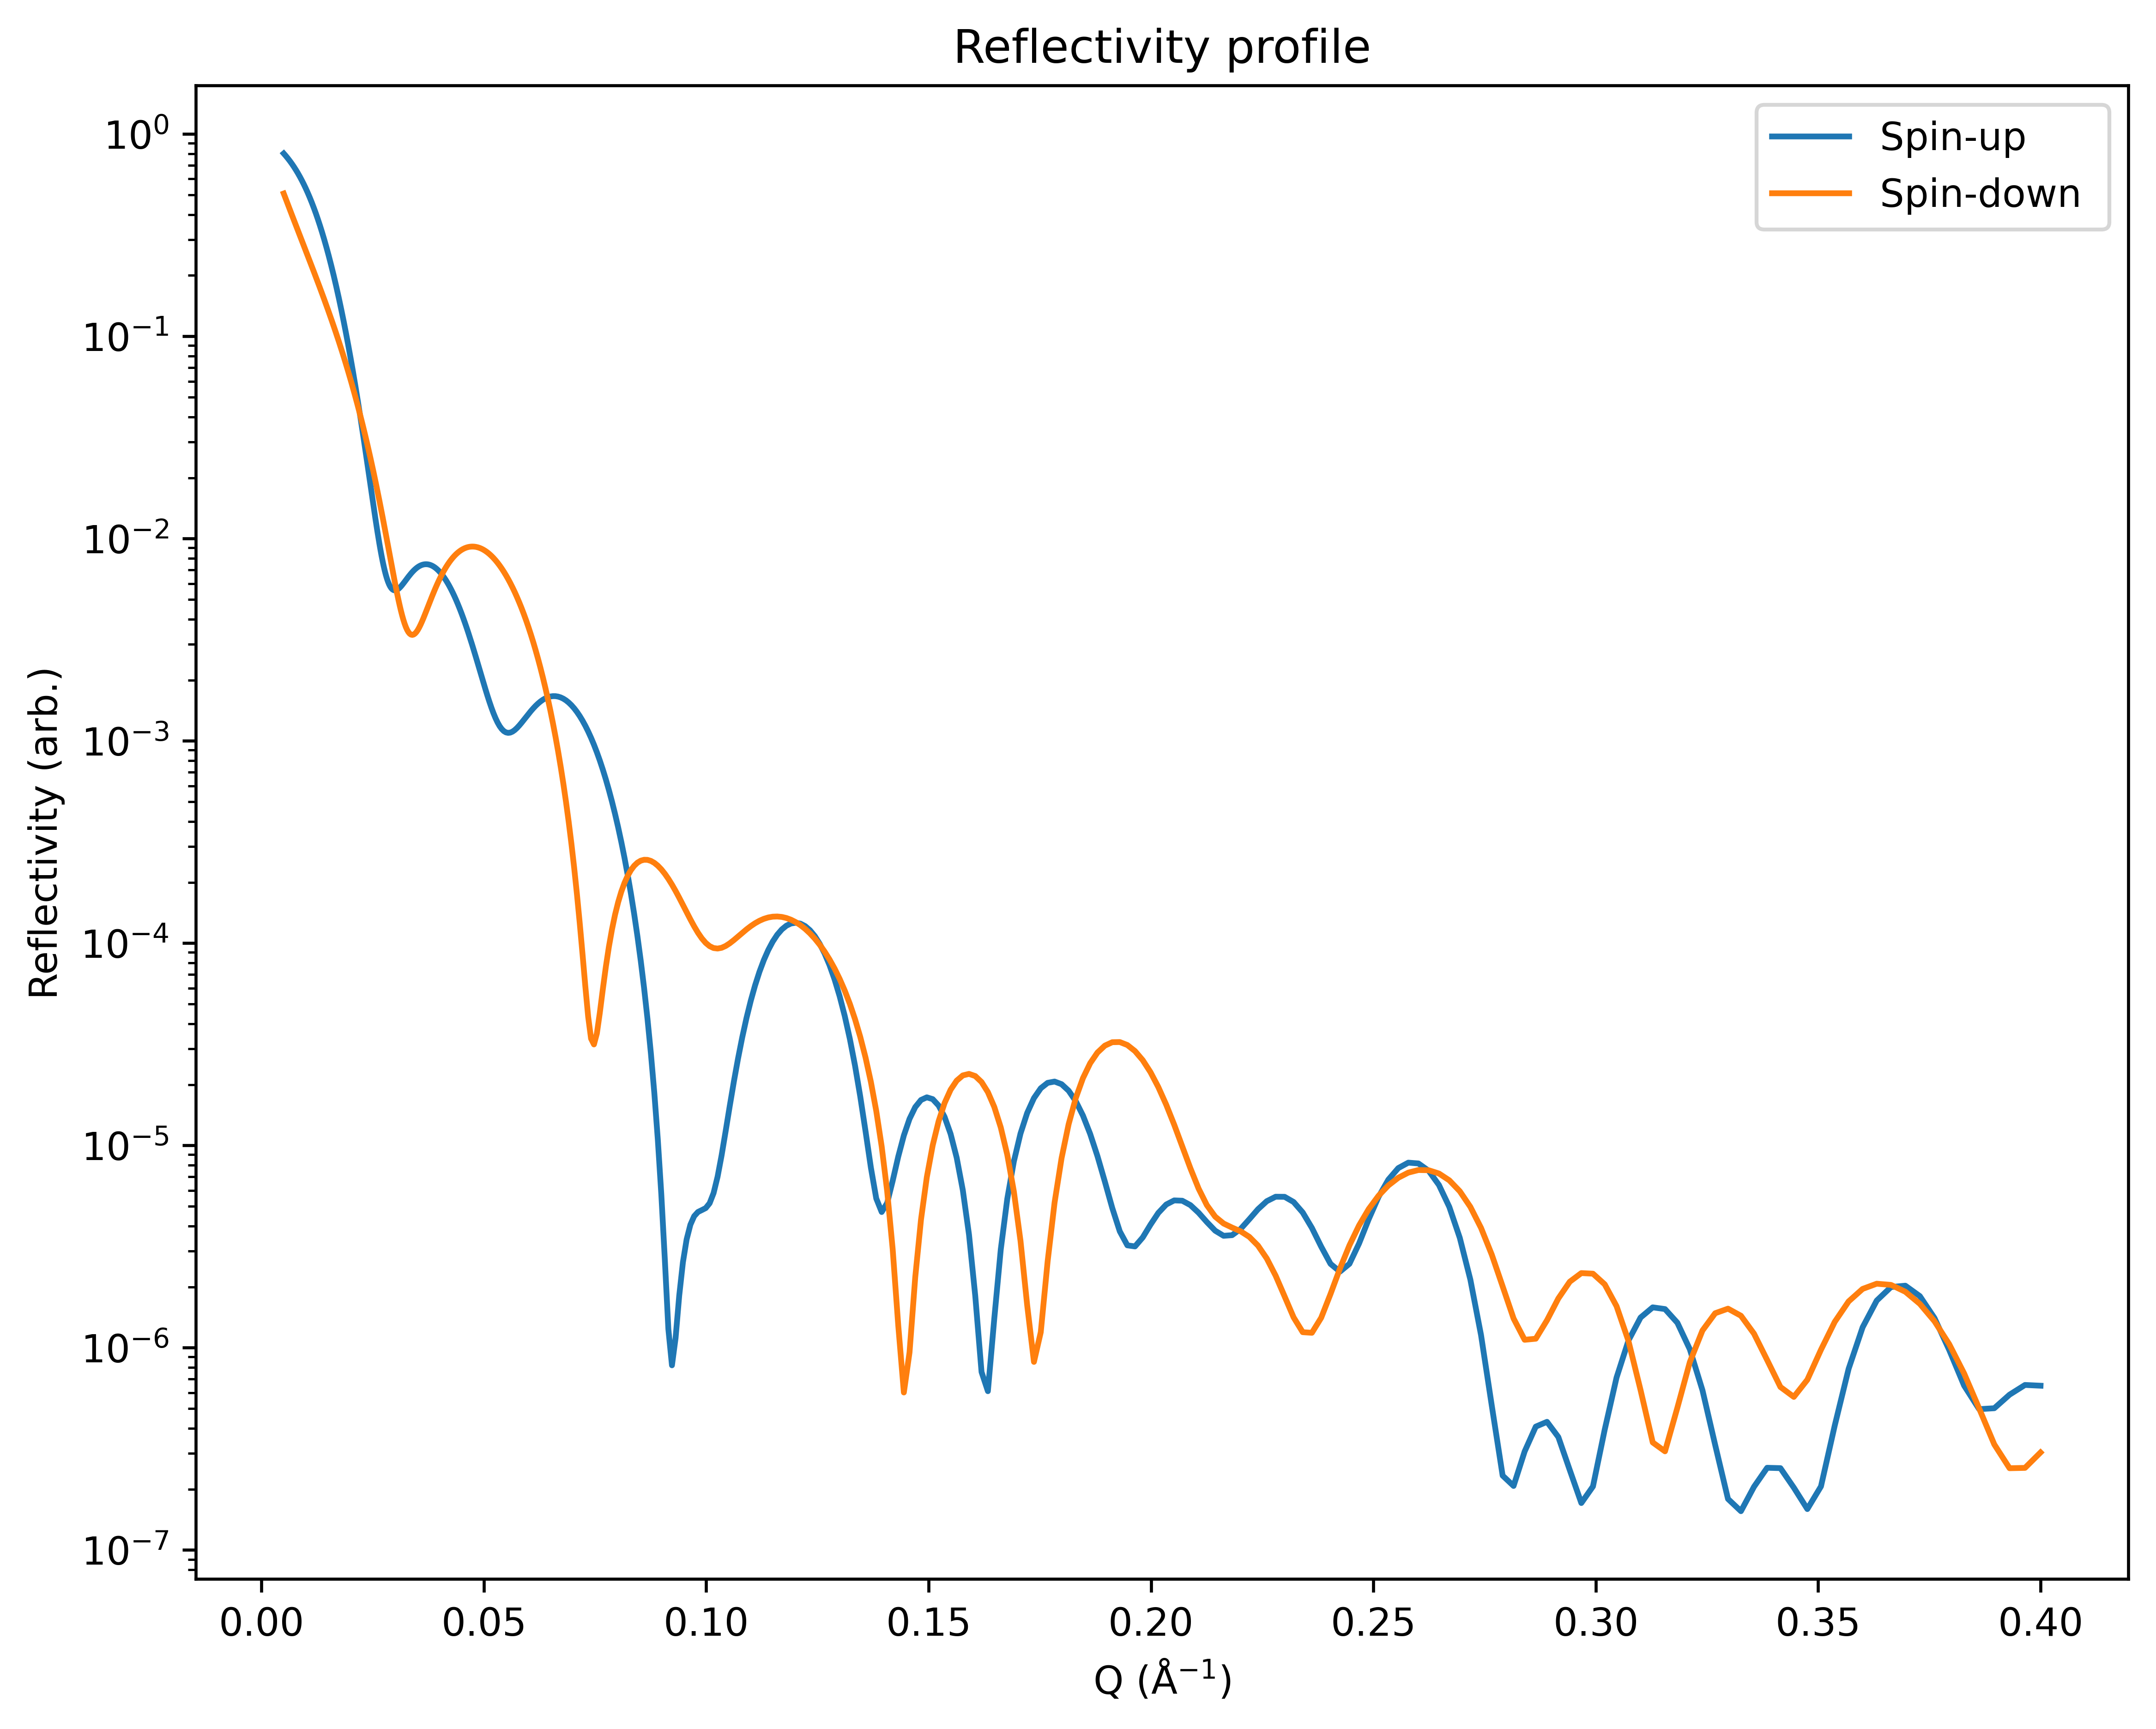

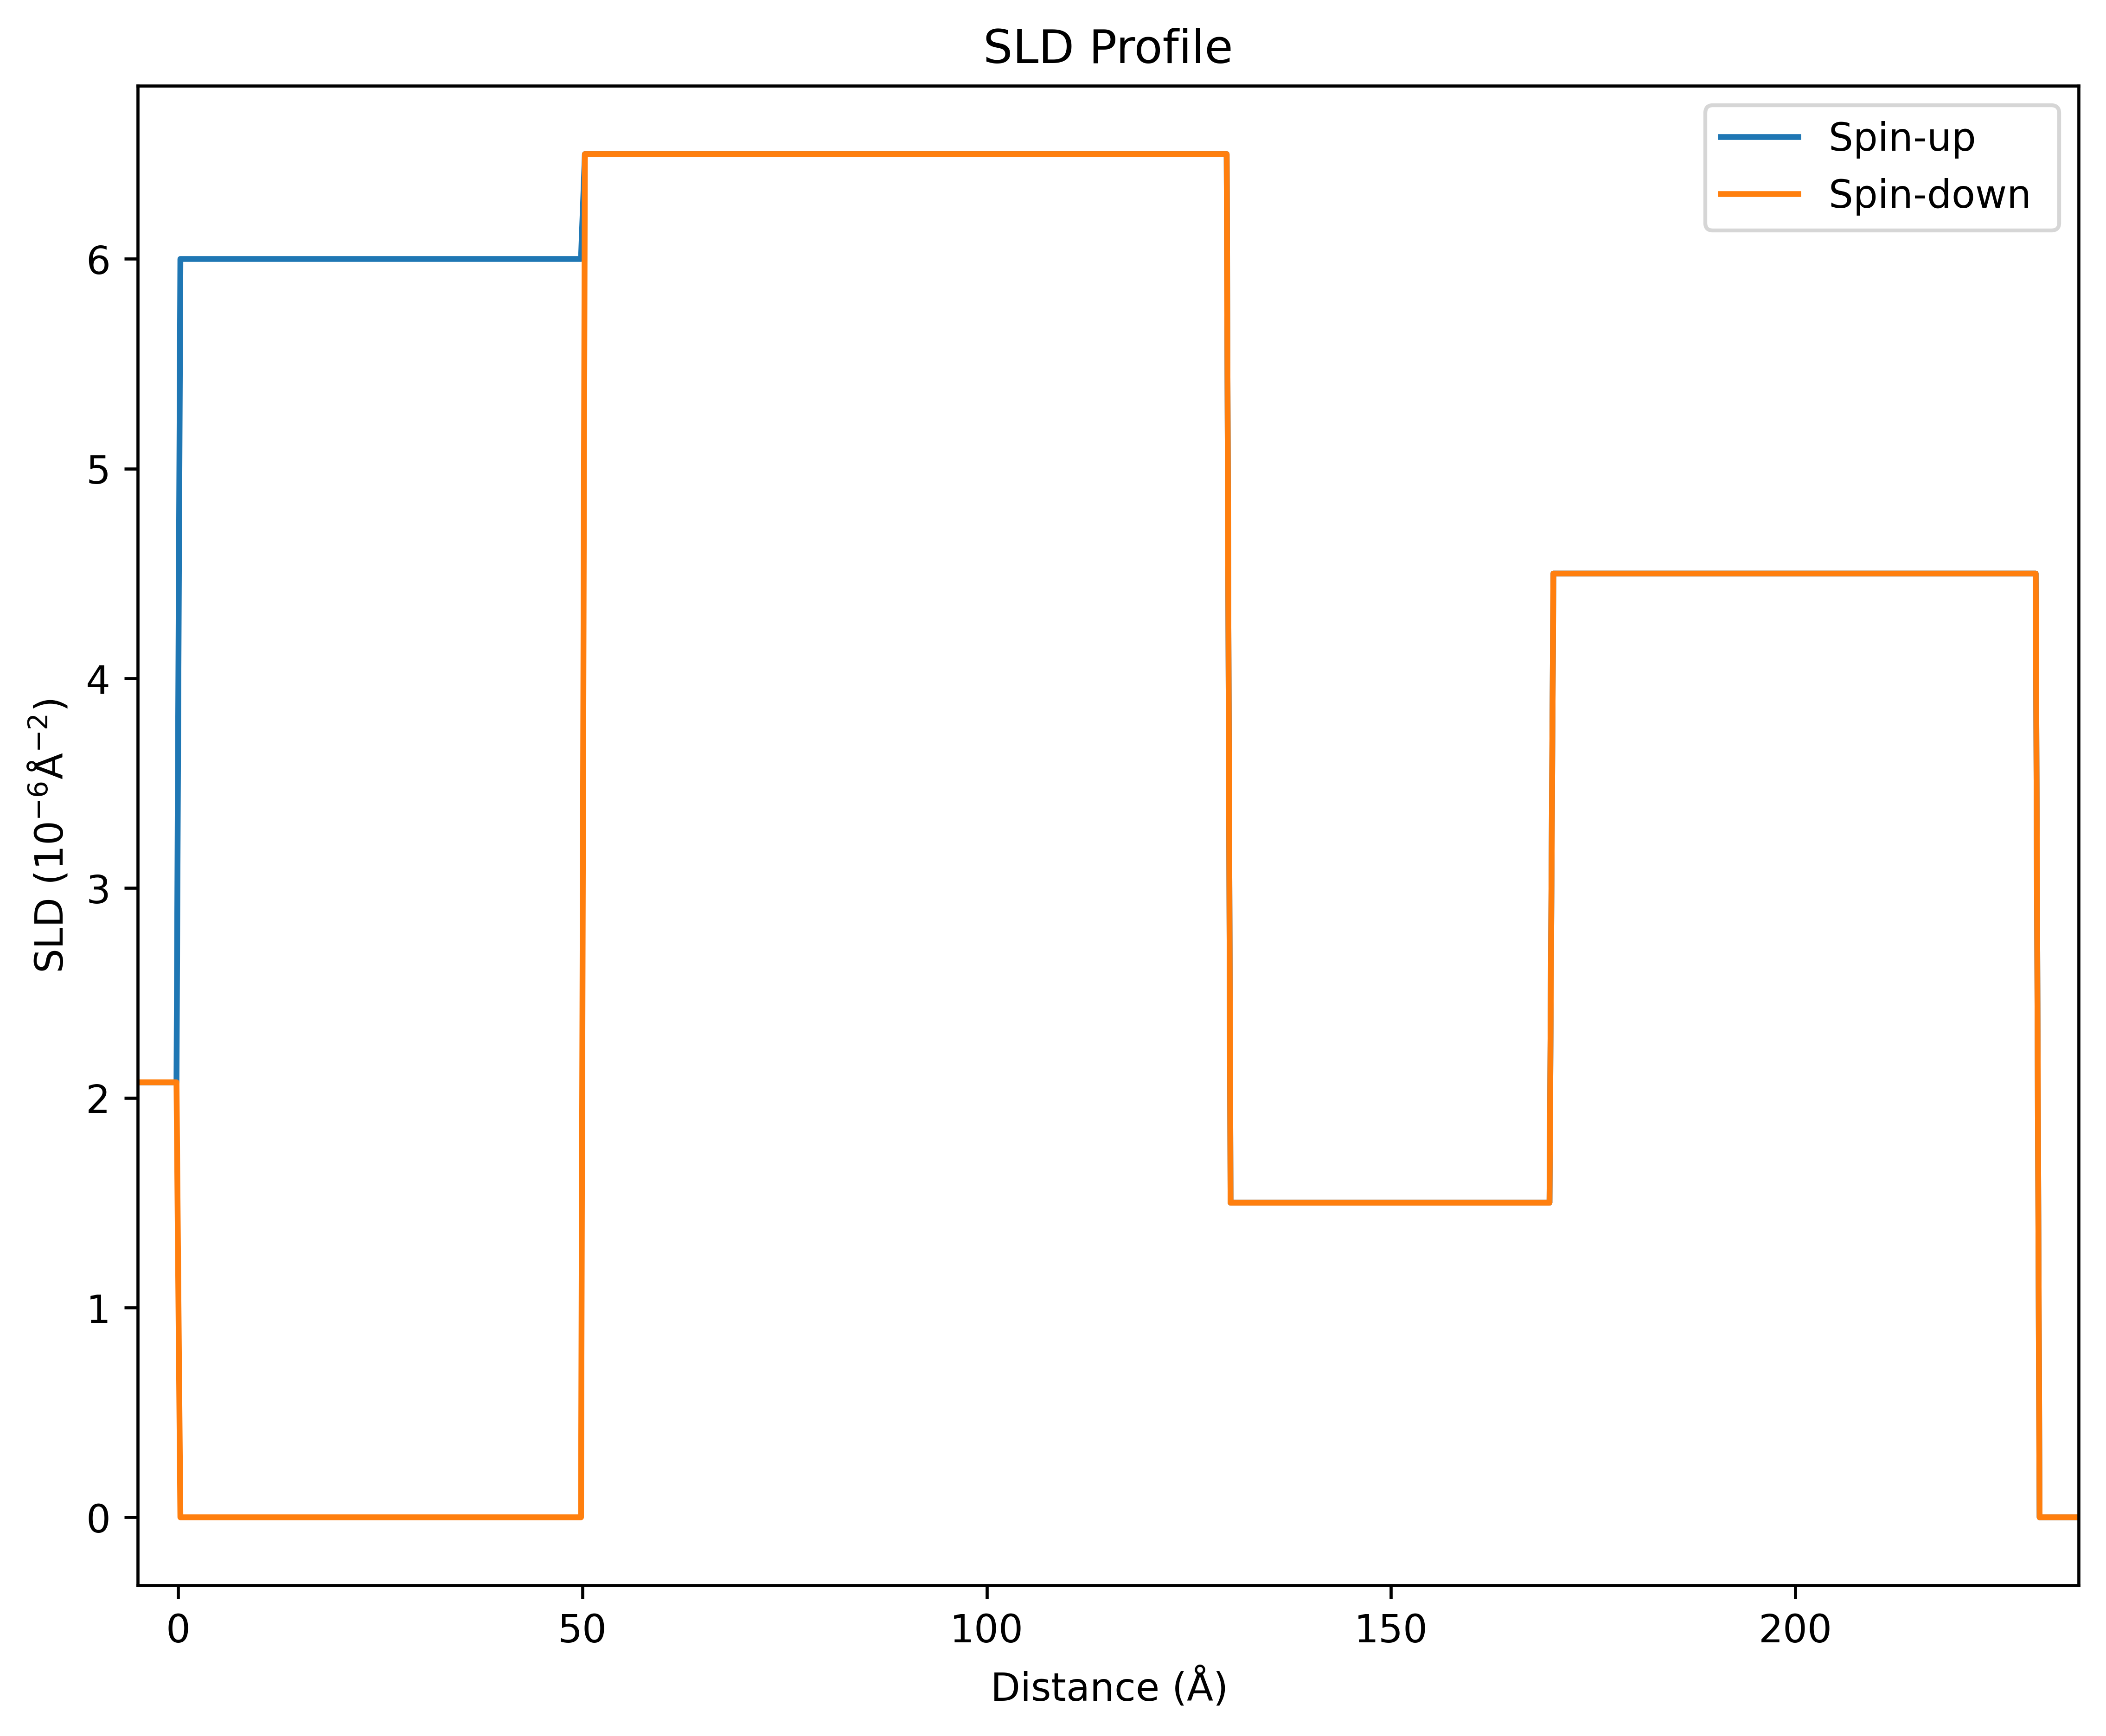

In [3]:
sample_structure = simple_sample()
magnetic_sample = Sample(sample_structure)
magnetic_sample.reflectivity_profile()
magnetic_sample.sld_profile()

When initialising the sample, we can choose to turn the polarisation state on or off for the experiment. When the polarisation state is set to `False`, then the magnetic part of the SLD is not used at all. For example:

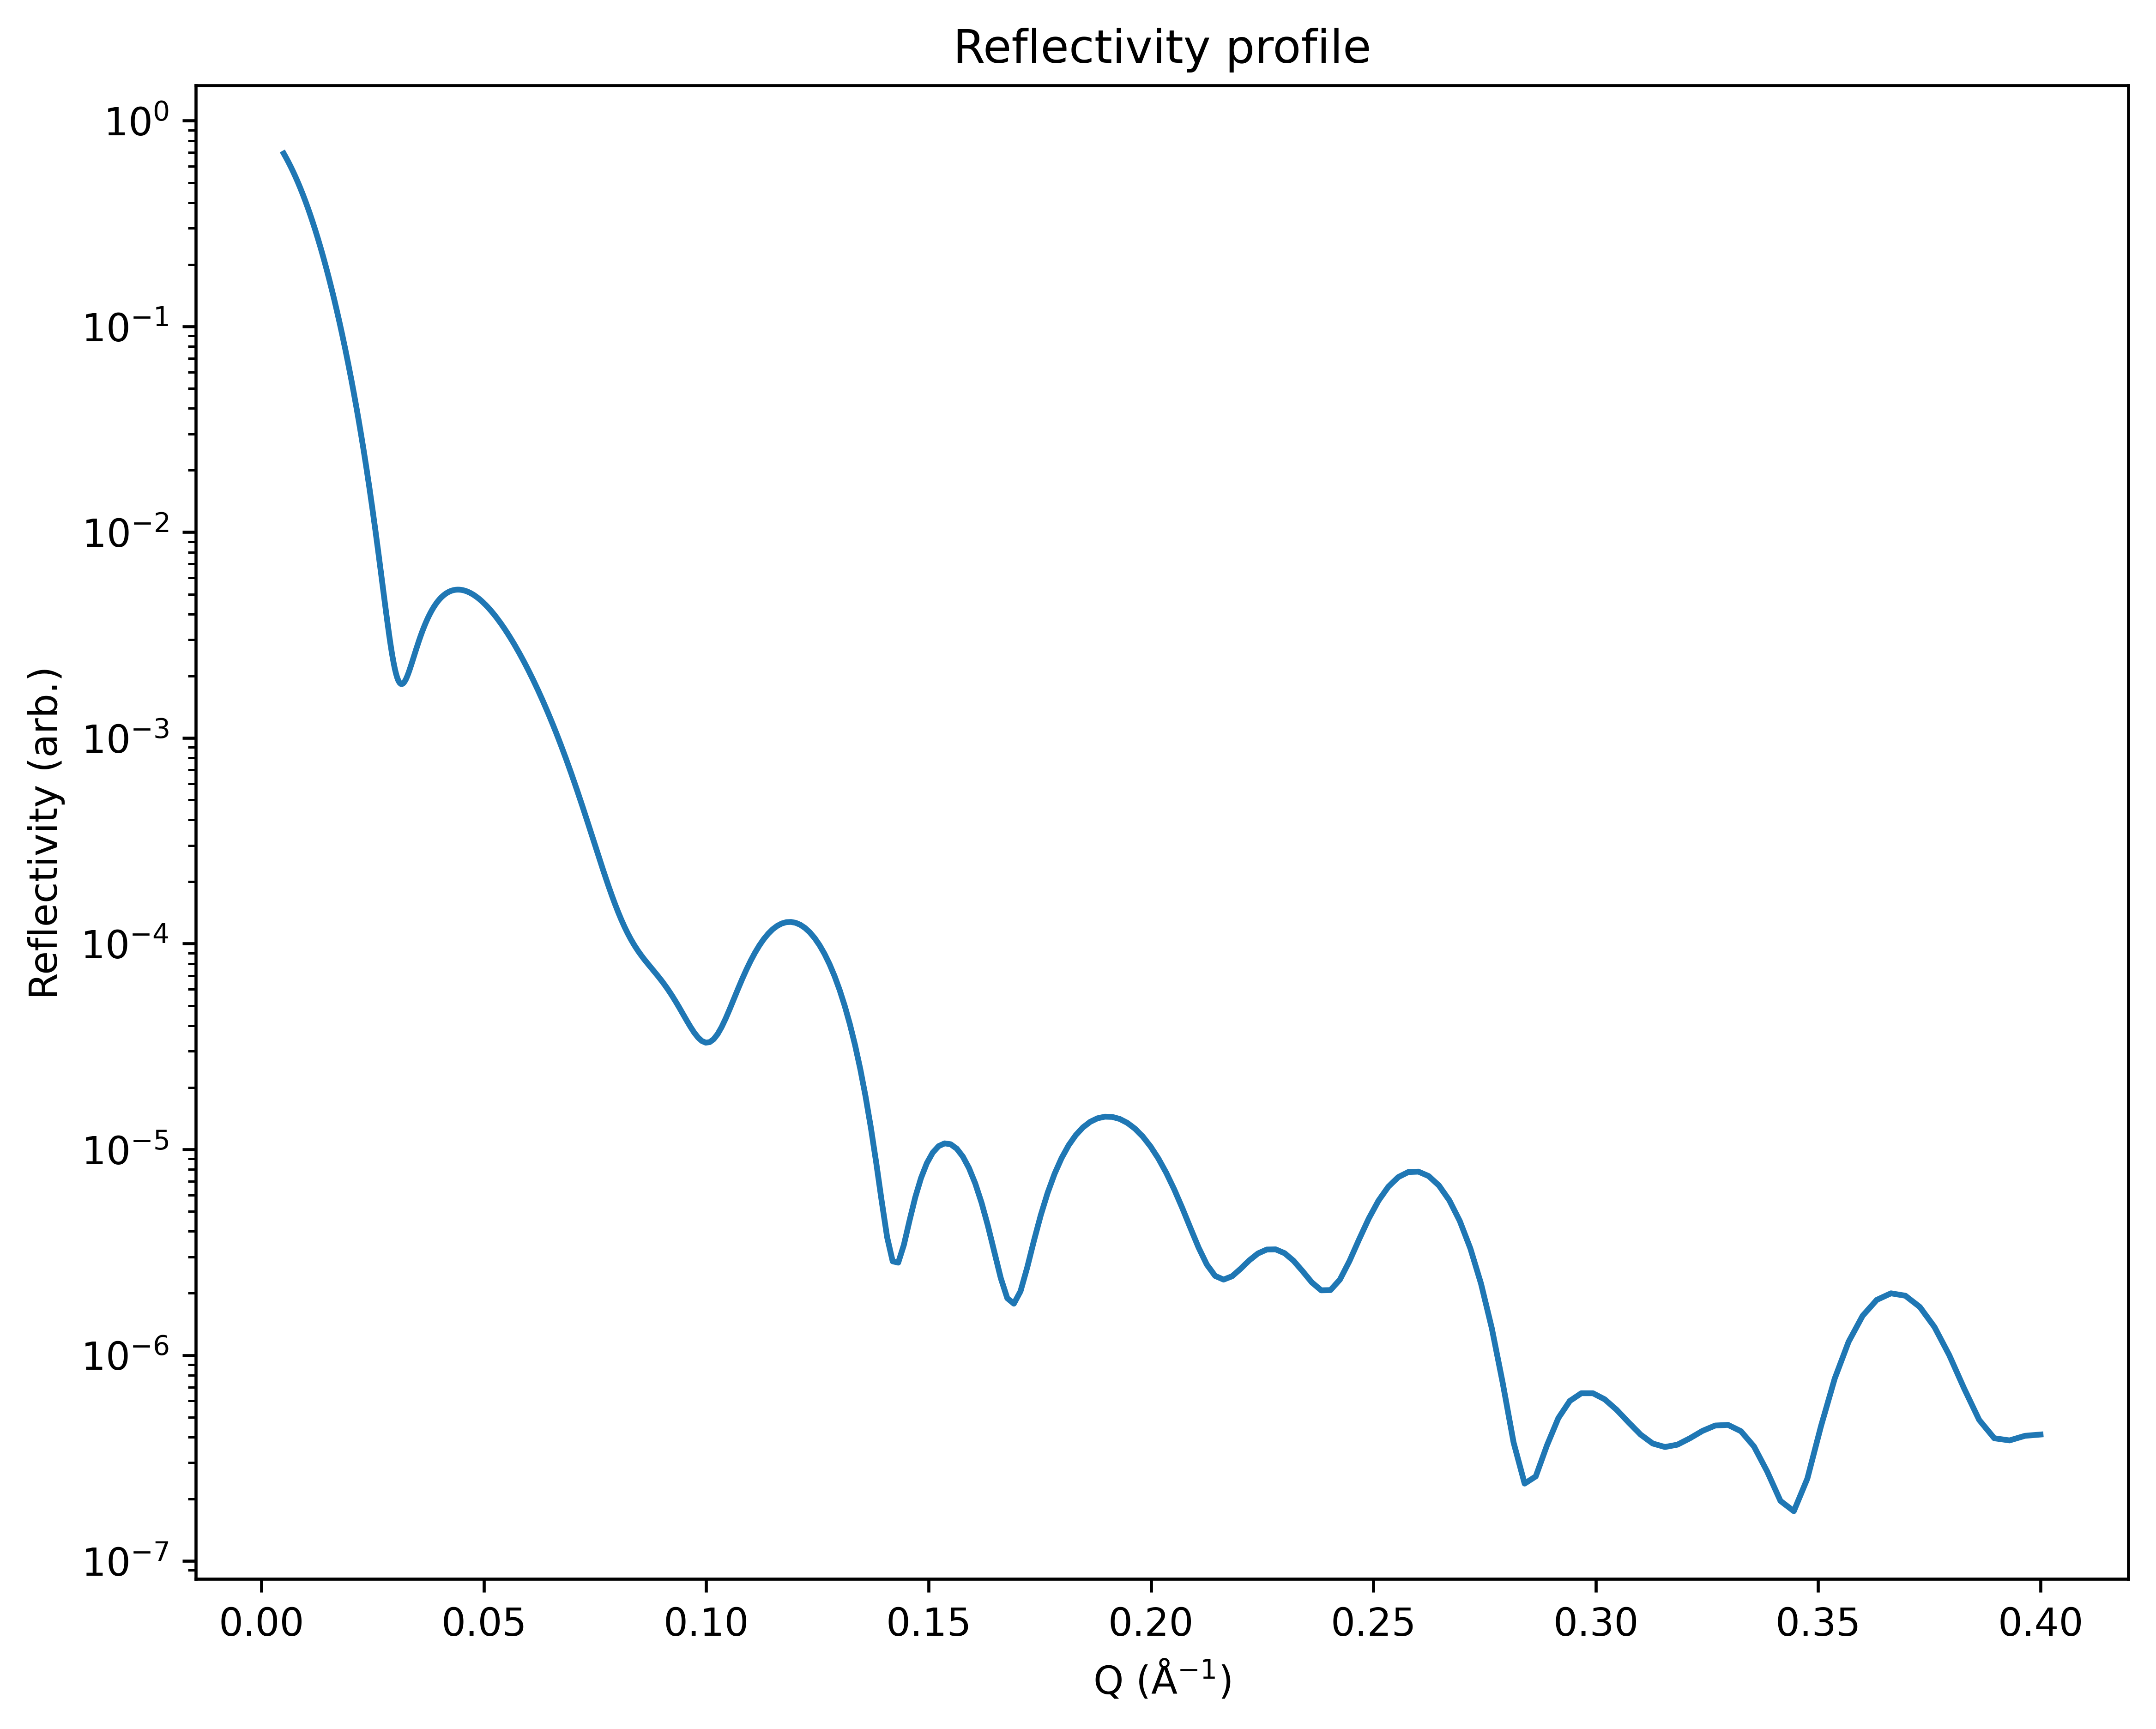

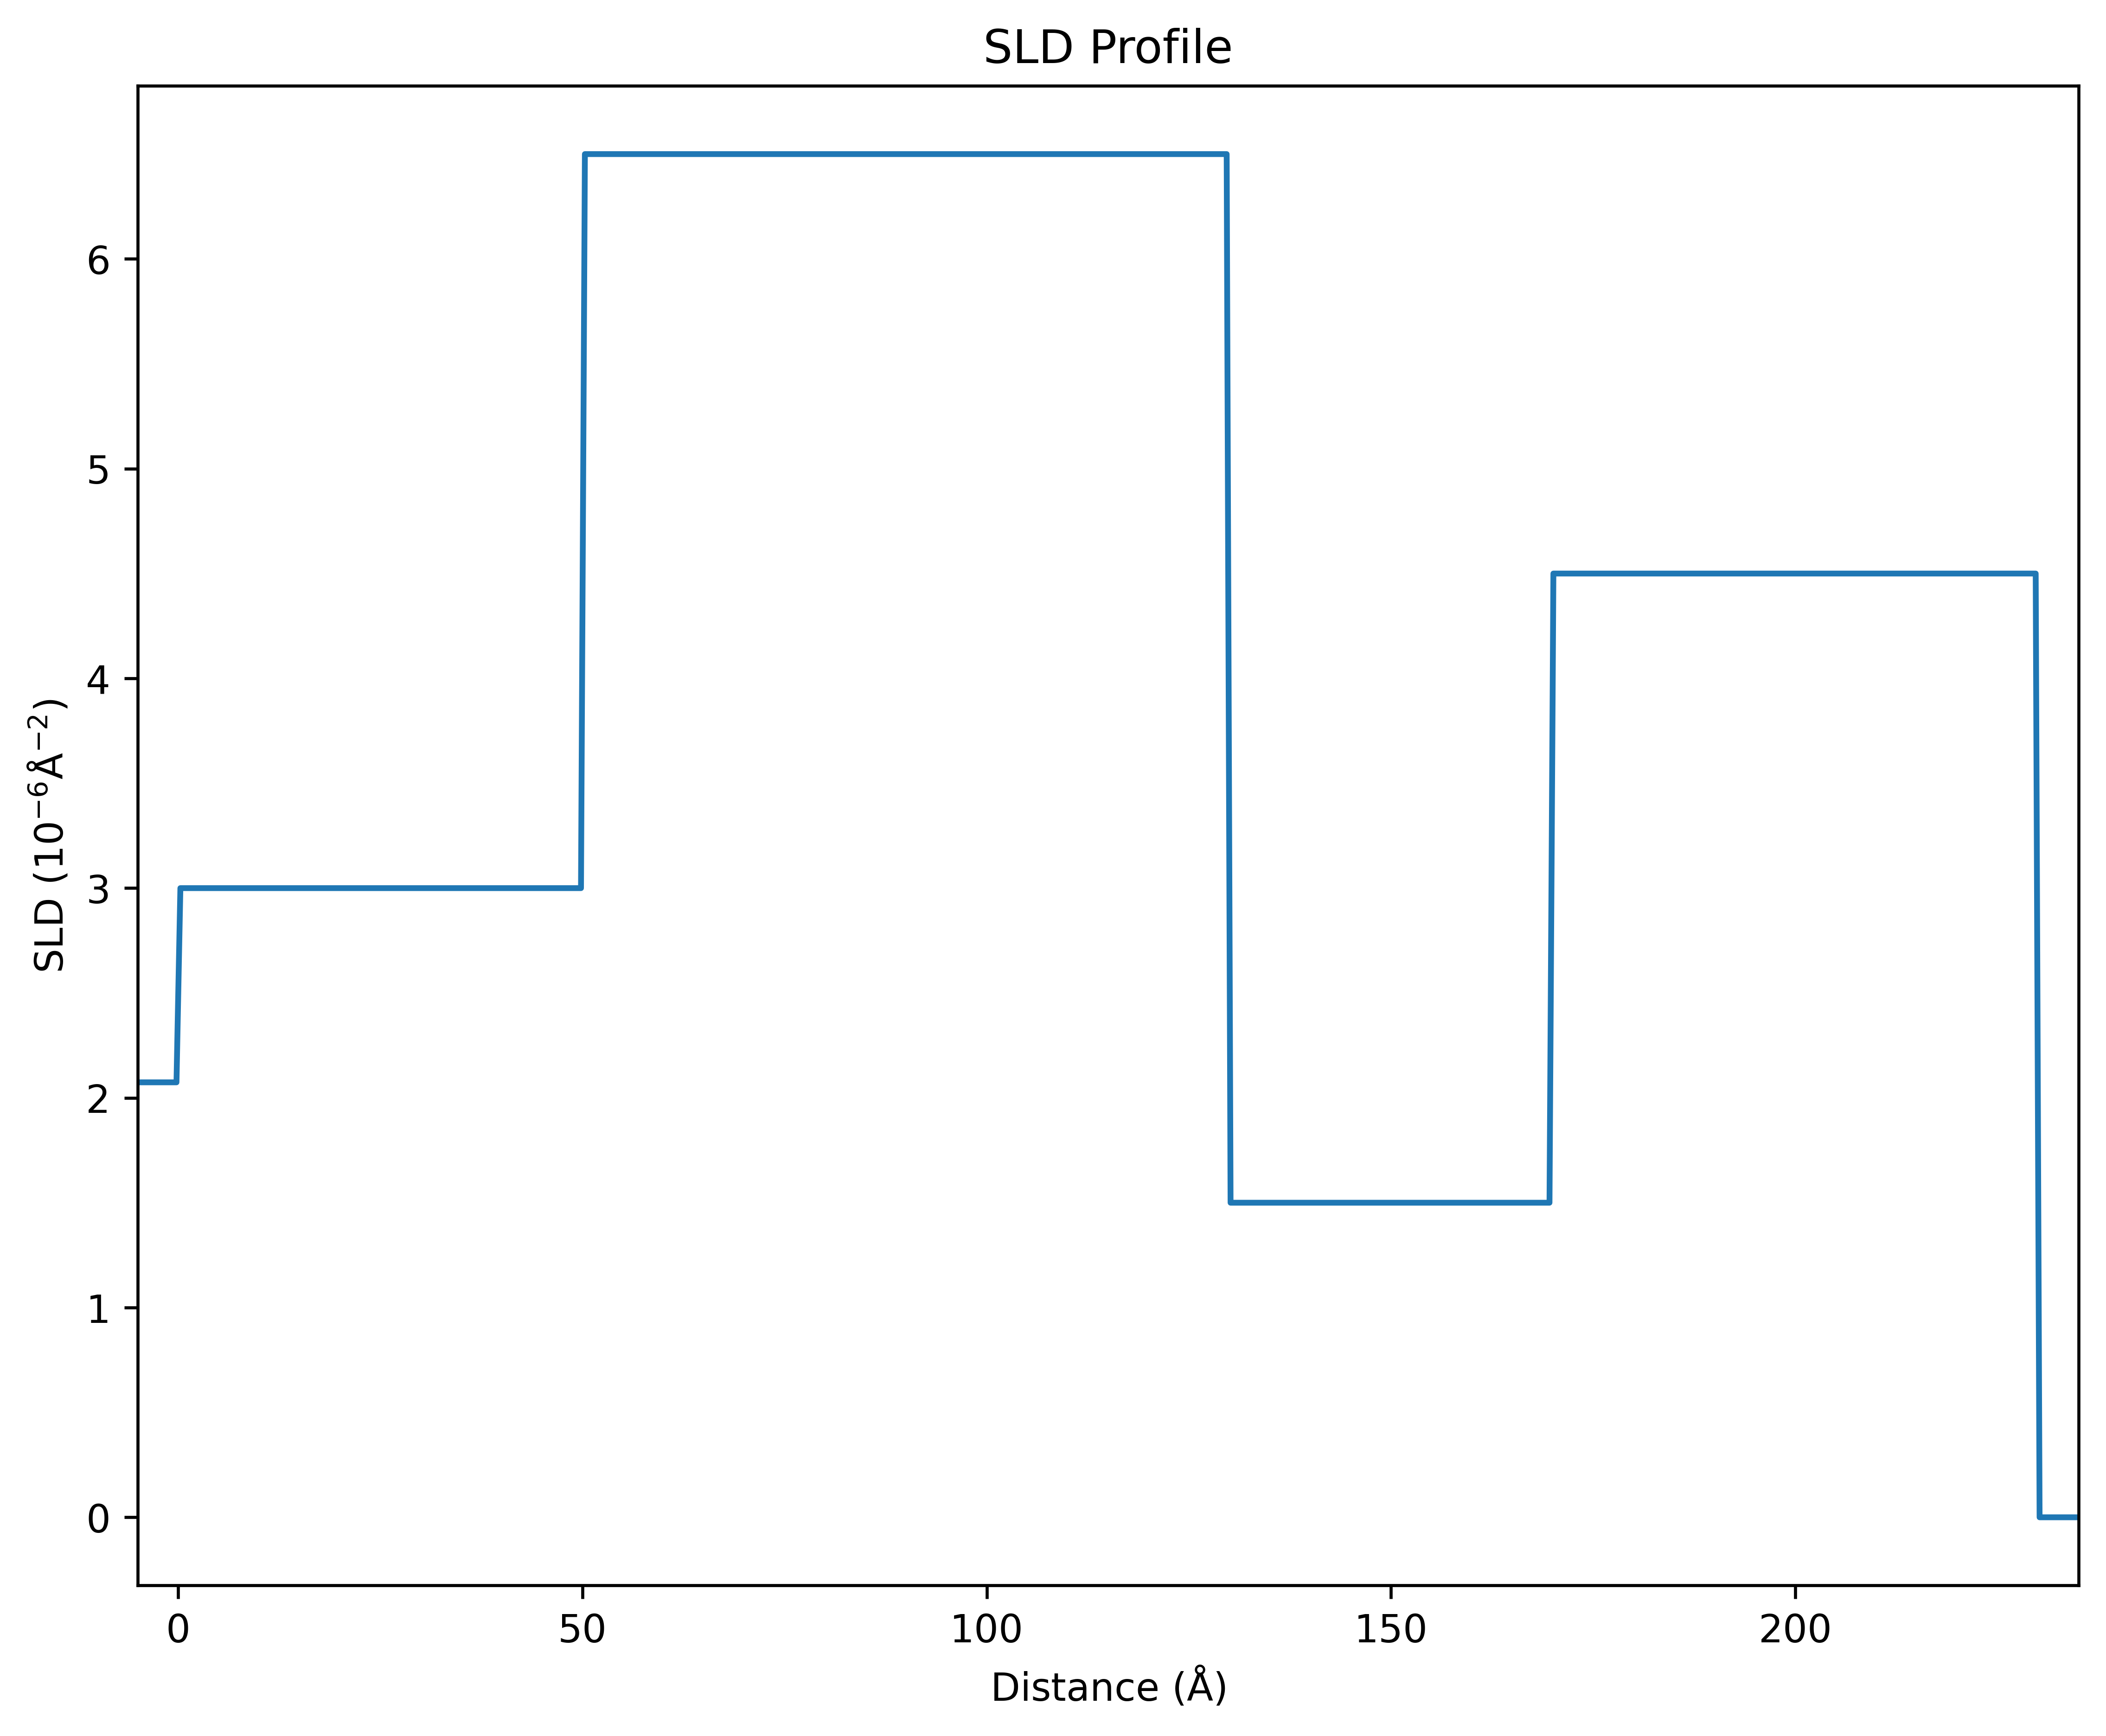

In [4]:
magnetic_sample = Sample(sample_structure, polarised=False)
magnetic_sample.reflectivity_profile()
magnetic_sample.sld_profile()

## Fisher optimitation of magnetic multilayers

Working with magnetic layers works exactly the same as non-magnetic layers. Magnetic parameters can thus also be optimized. 
For these optimizations, the experiment is simulated twice with equal measuring time in the spin-up as well as in the spin-down direction. The neutron flux is automatically cut in half, due to the neutron loss in the polarization stage.

In this example, we have a material 

In [5]:
def simple_sample_MRL():
    """Define a bilayer sample, and return the associated refnx model"""
    
    # Define the fitting parameters for the sample:
    layer1_thick = Parameter(80, 'Layer 1 Thickness', (50, 120))
    layer2_thick = Parameter(40, 'Layer 2 Thickness', (30, 50))
    layer3_thick = Parameter(60, 'Layer 3 Thickness', (50, 120))    
    layer1_rough = Parameter(4, 'Layer 1 Roughness', (2, 10))
    layer2_rough = Parameter(5, 'Layer 2 Roughness', (2, 10))
    layer3_rough = Parameter(3, 'Layer 3 Roughness', (50, 120))
    
    # Define the parameters for the reference layer that we want to optimize
    ref_thick = Parameter(5000, 'Reference layer Thickness', (0, 400))
    ref_sld = Parameter(3, 'Reference layer Nuclear SLD', (-1.9, 9.4))
    ref_msld = Parameter(3, 'Reference layer Magnetic SLD', (0, 7))

    # Tell HOGBEN that these parameters should be optimized
    ref_thick.optimize = True
    ref_sld.optimize = True
    ref_msld.optimize = True
    
    # Construct the layers
    air = SLD(0, name='Air')
    layer1 = SLD(6.5, name="Layer 1")(thick=layer1_thick, rough=0)
    layer2 = SLD(1.5, name="Layer 2")(thick=layer2_thick, rough=0)
    layer3 = SLD(4.5, name="Layer 3")(thick=layer3_thick, rough=0)   
    ref_layer_m = MagneticSLD(ref_sld, ref_msld, name = "Reference layer")(thick=ref_thick, rough=0)

    substrate = SLD(2.074, name='Substrate')(rough=0)

    # Put all fitting parameters in a list
    params = [
        layer1_rough,
        layer2_rough,
        layer3_rough,
        layer1_thick,
        layer2_thick,
        layer3_thick,
    ]
    
    # Set all fitting parameters to be varying
    for param in params:
        param.vary = True
    
    # Create a structure, separating each layer with a `|`
    structure = substrate | ref_layer_m | layer1 | layer2 | layer3 | air
    return structure

The parameters with the highest information could be found at:
Reference layer Thickness: 267
Reference layer Magnetic SLD: 5.45
Reference layer Nuclear SLD: -1.54
-----------------------------------------------------------------
The minimum eigenvalue of the Fisher Information before optimization: 0.107
The minimum eigenvalue of the Fisher Information after optimization: 0.139
The information content is 1.3 times as large after optimization.


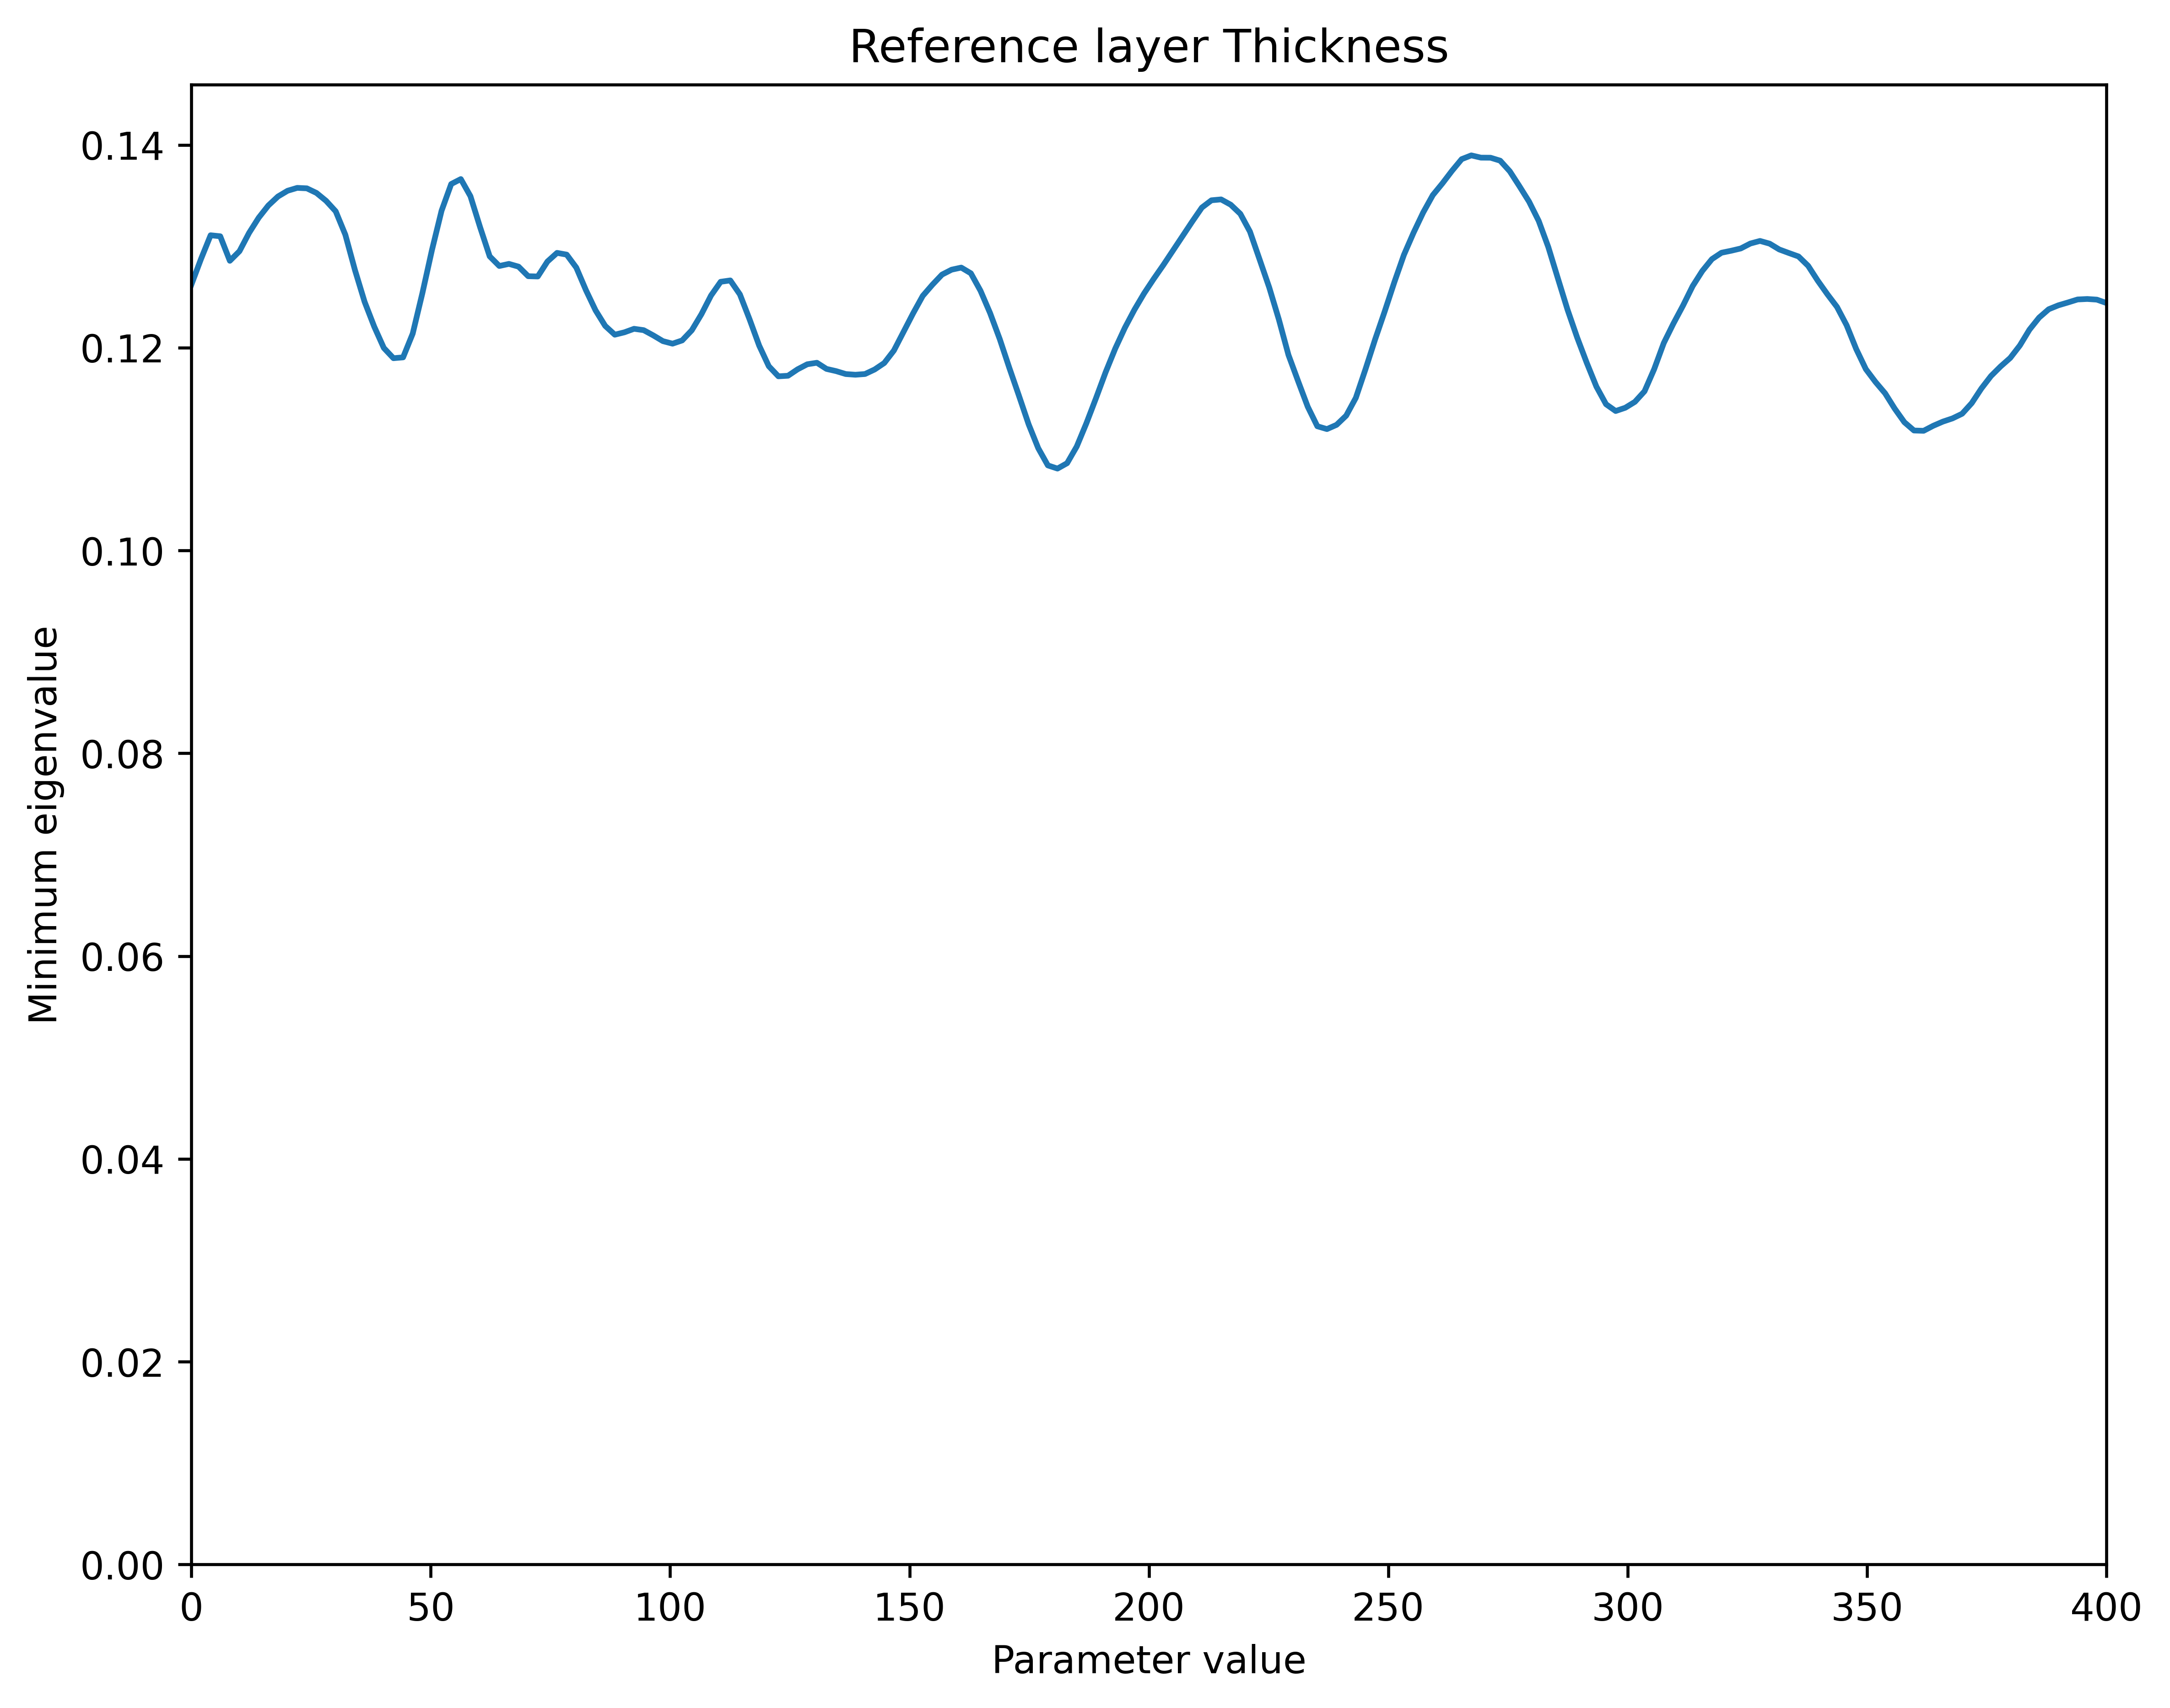

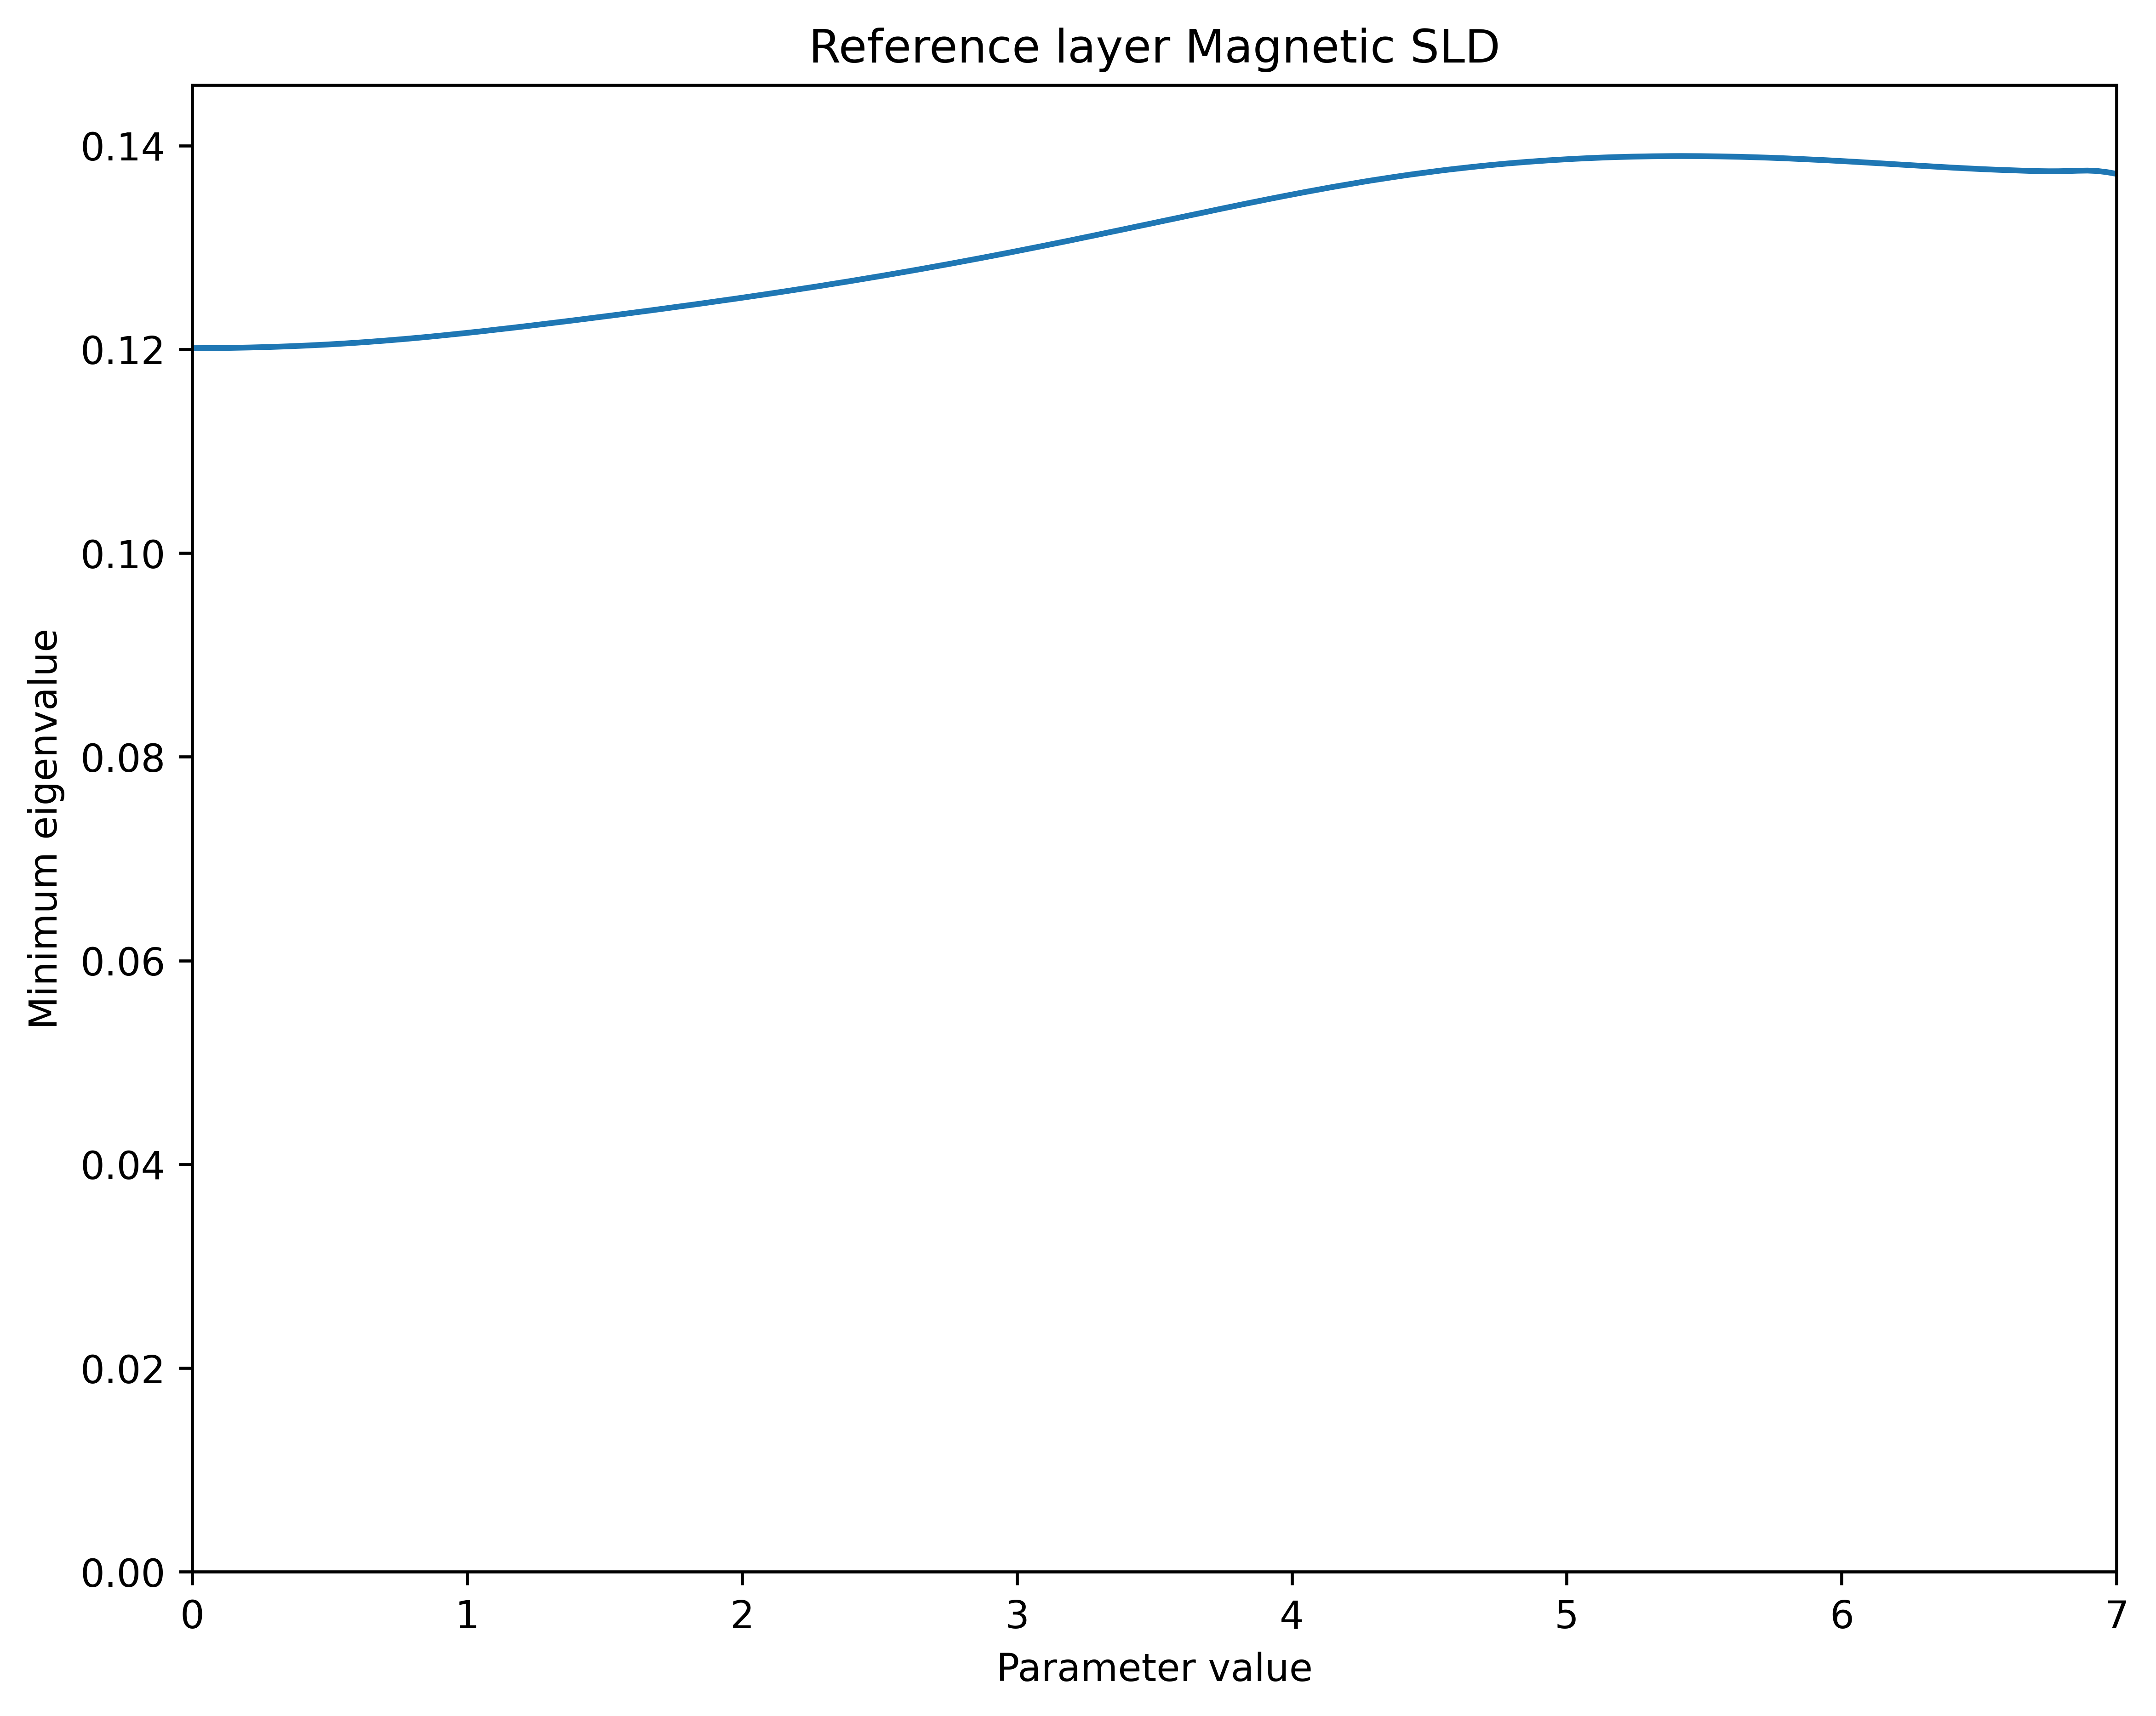

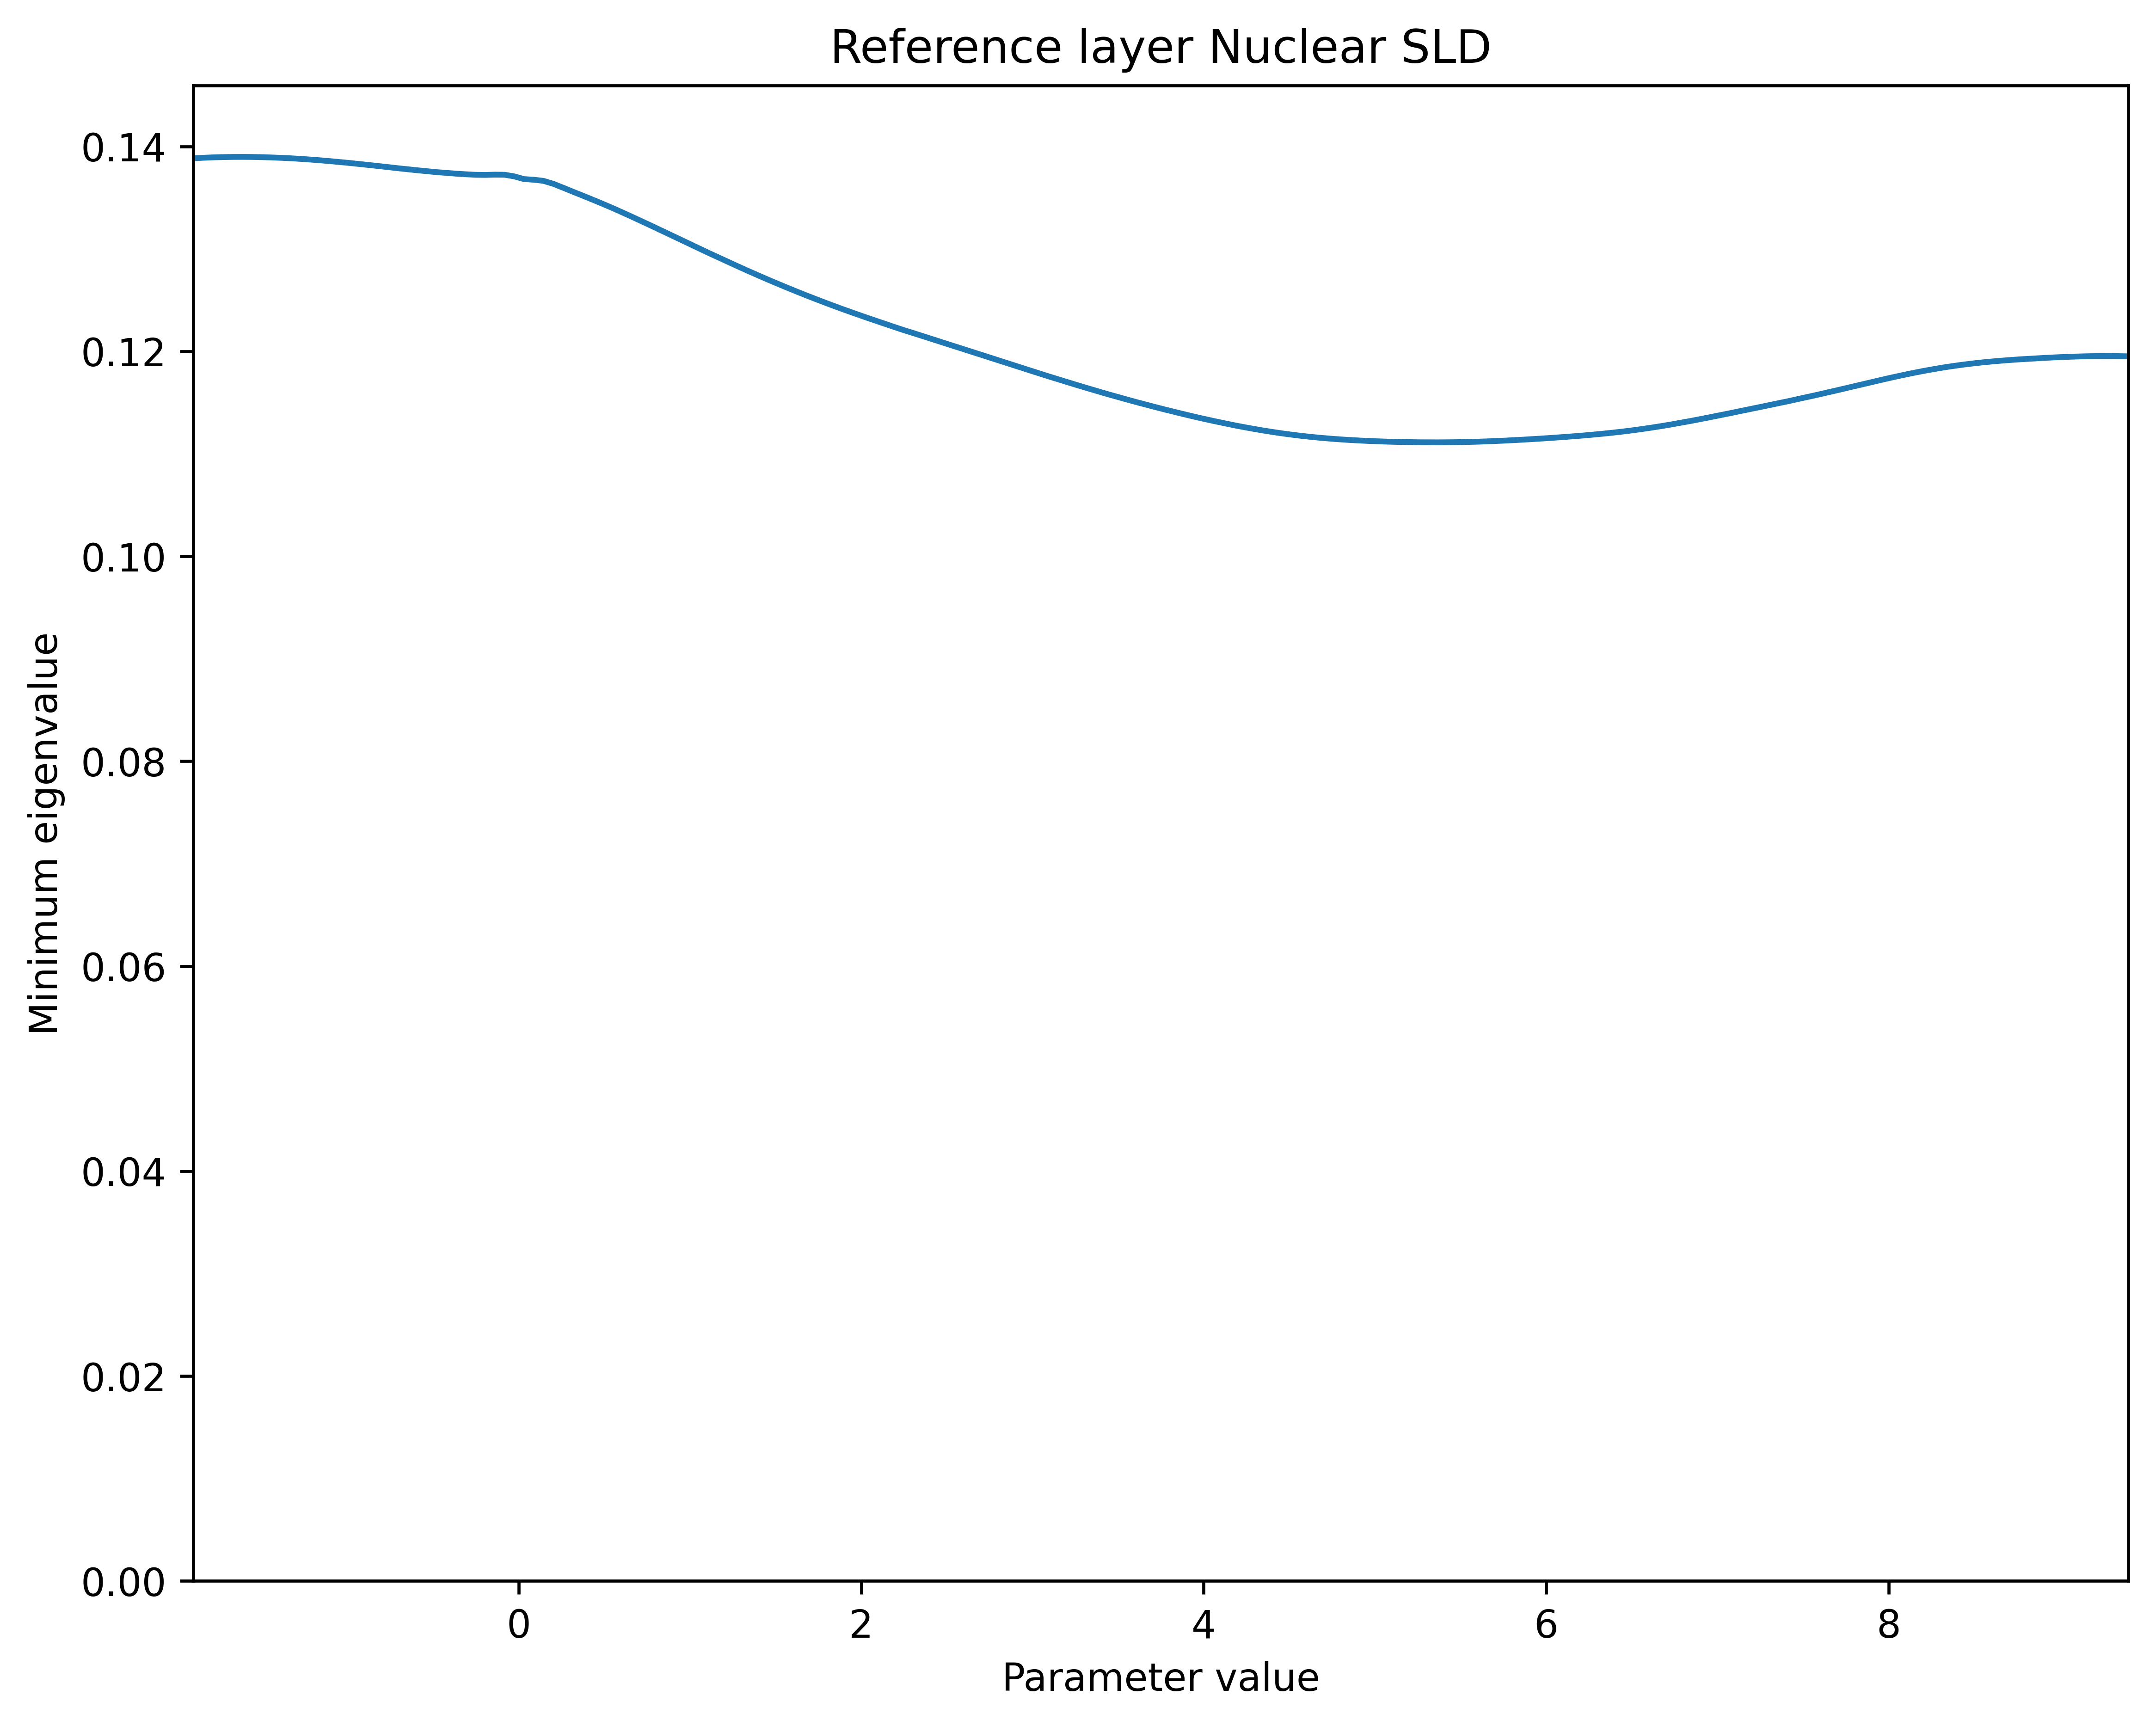

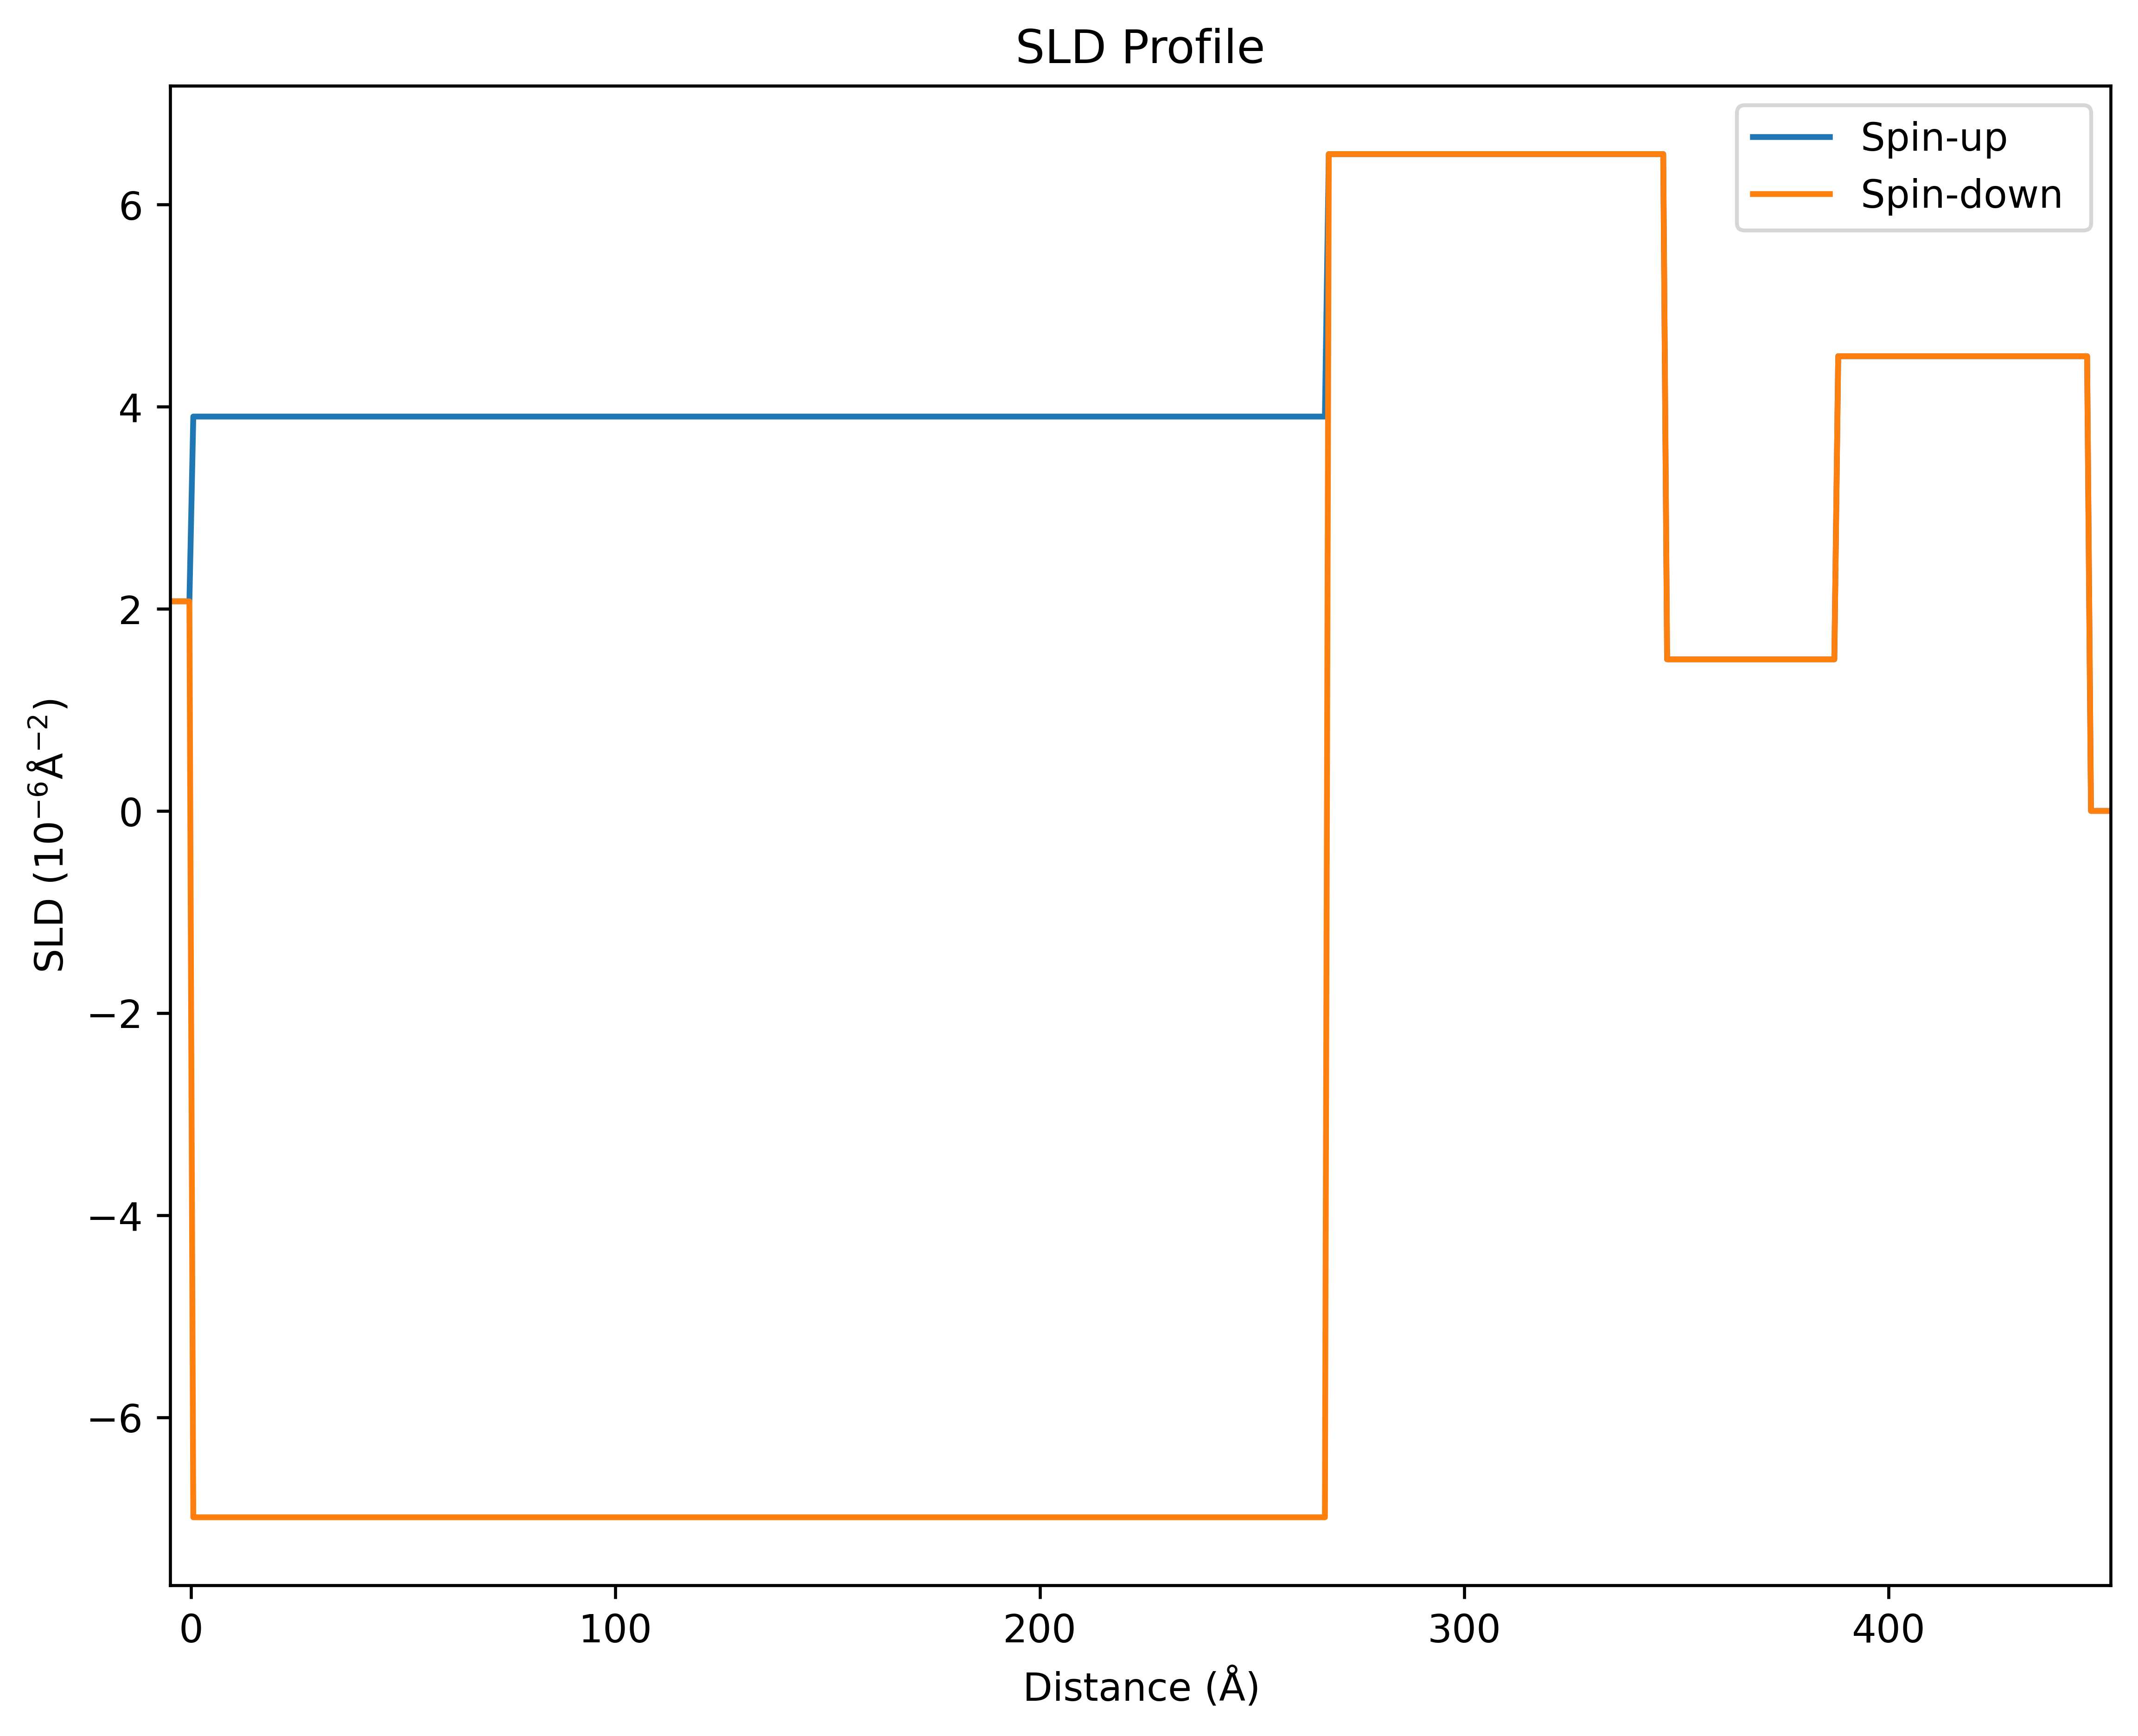

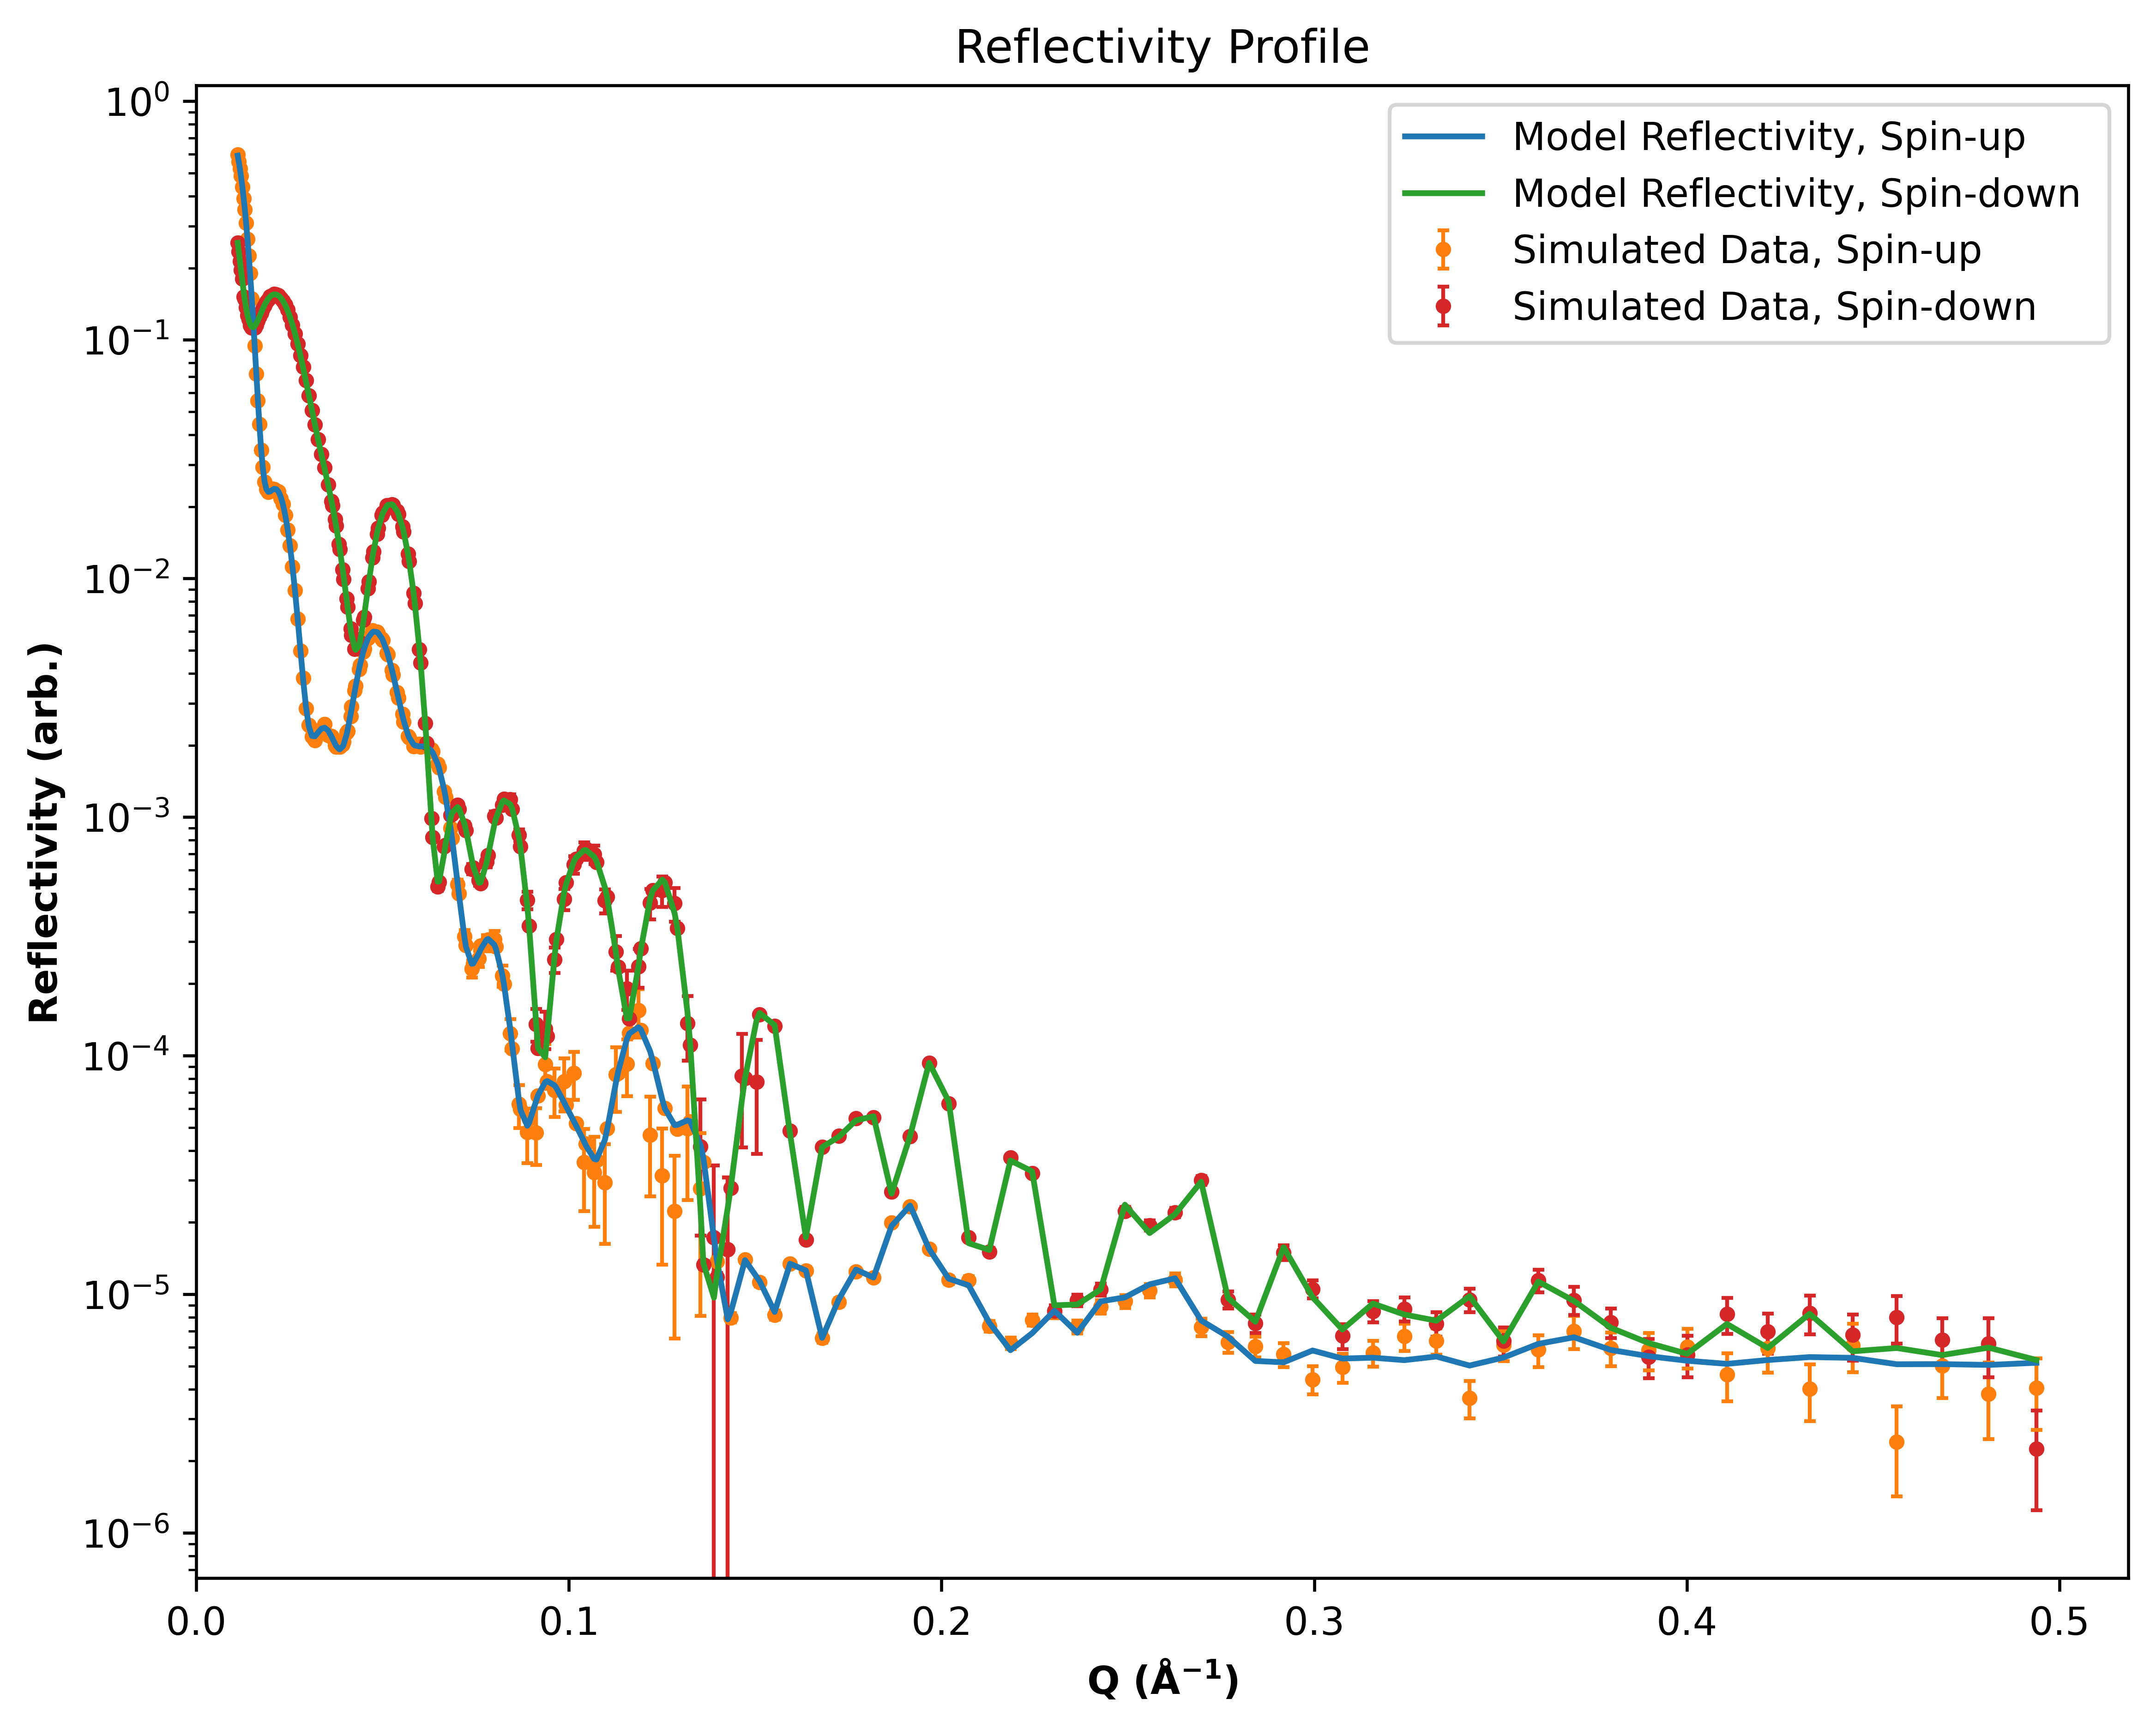

In [6]:
sample_structure = simple_sample_MRL()
magnetic_sample = Sample(sample_structure, polarised=True)
angle_times = [(0.7, 100, 100),
               (2.3, 100, 400),
               ]    
optimise_parameters(magnetic_sample, angle_times)

We can do the same optimization as well for an unpolarised experiment, this can be simply done by initialising the sample with `polarised=False`, or alternatively setting `magnetic_sample.polarised = False` after it has been initialized. 

The parameters with the highest information could be found at:
Reference layer Nuclear SLD: 4.84
Reference layer Thickness: 96
-----------------------------------------------------------------
The minimum eigenvalue of the Fisher Information before optimization: 0.125
The minimum eigenvalue of the Fisher Information after optimization: 0.135
The information content is 1.08 times as large after optimization.


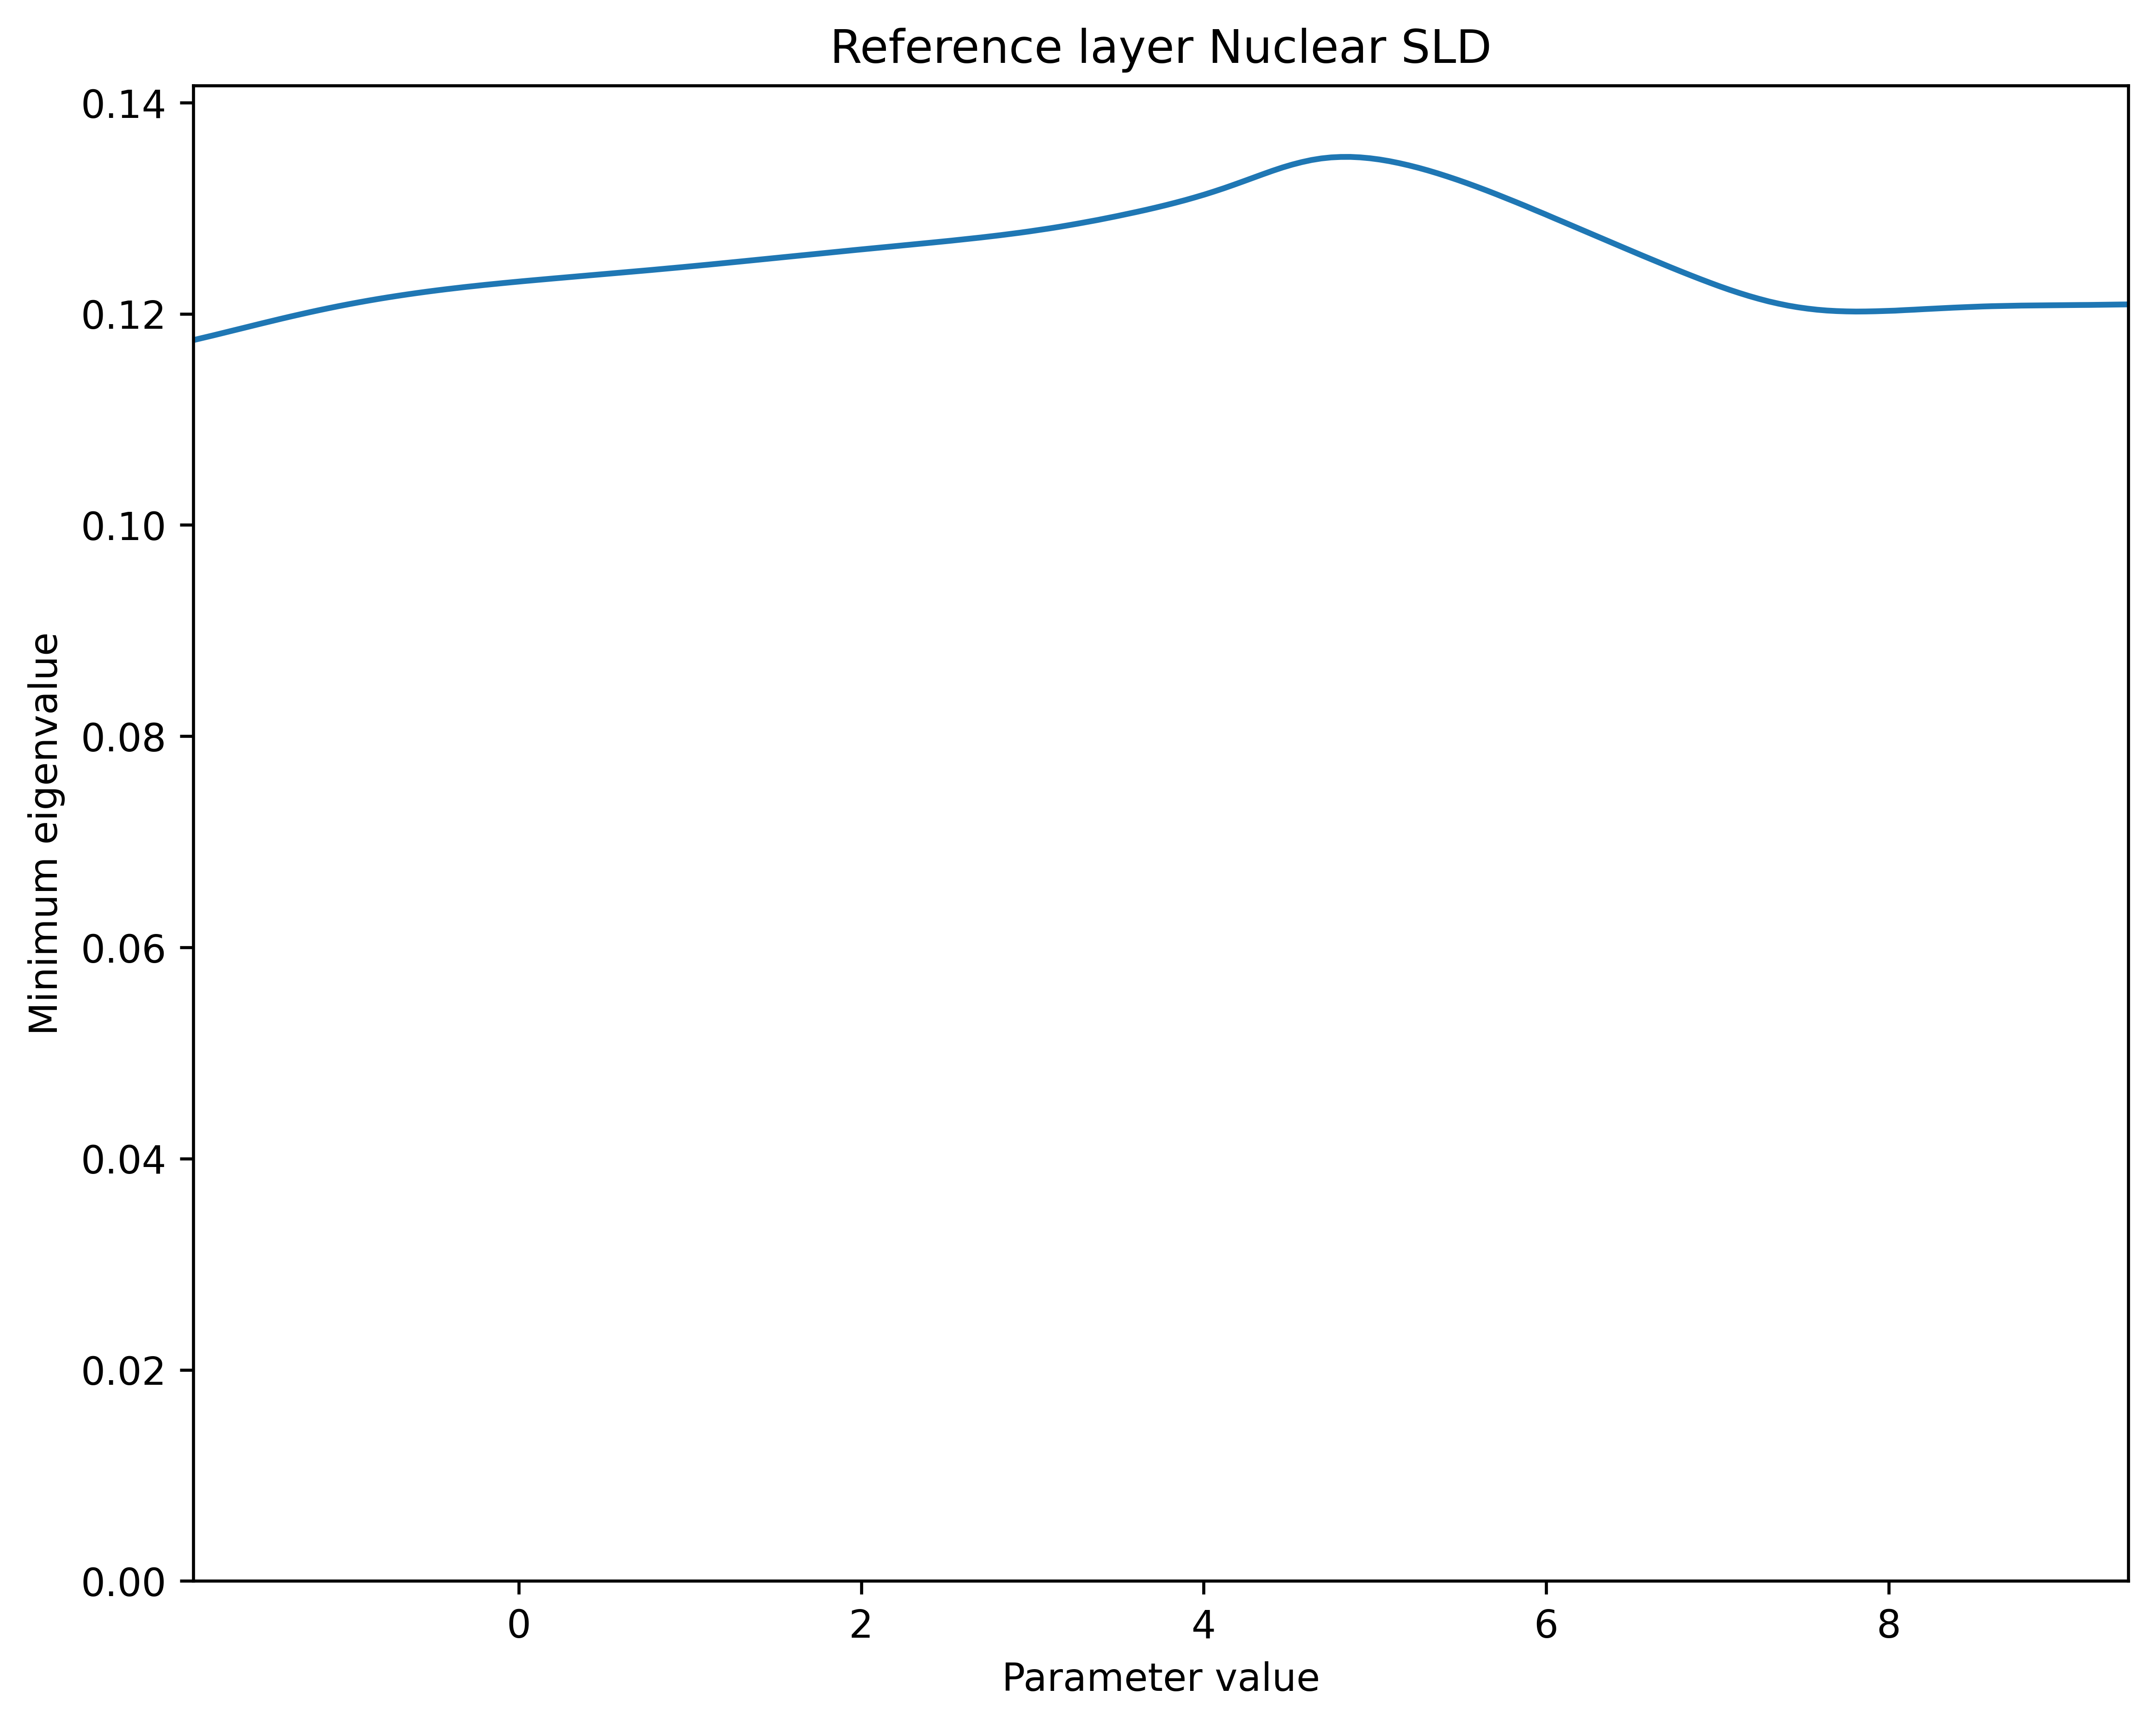

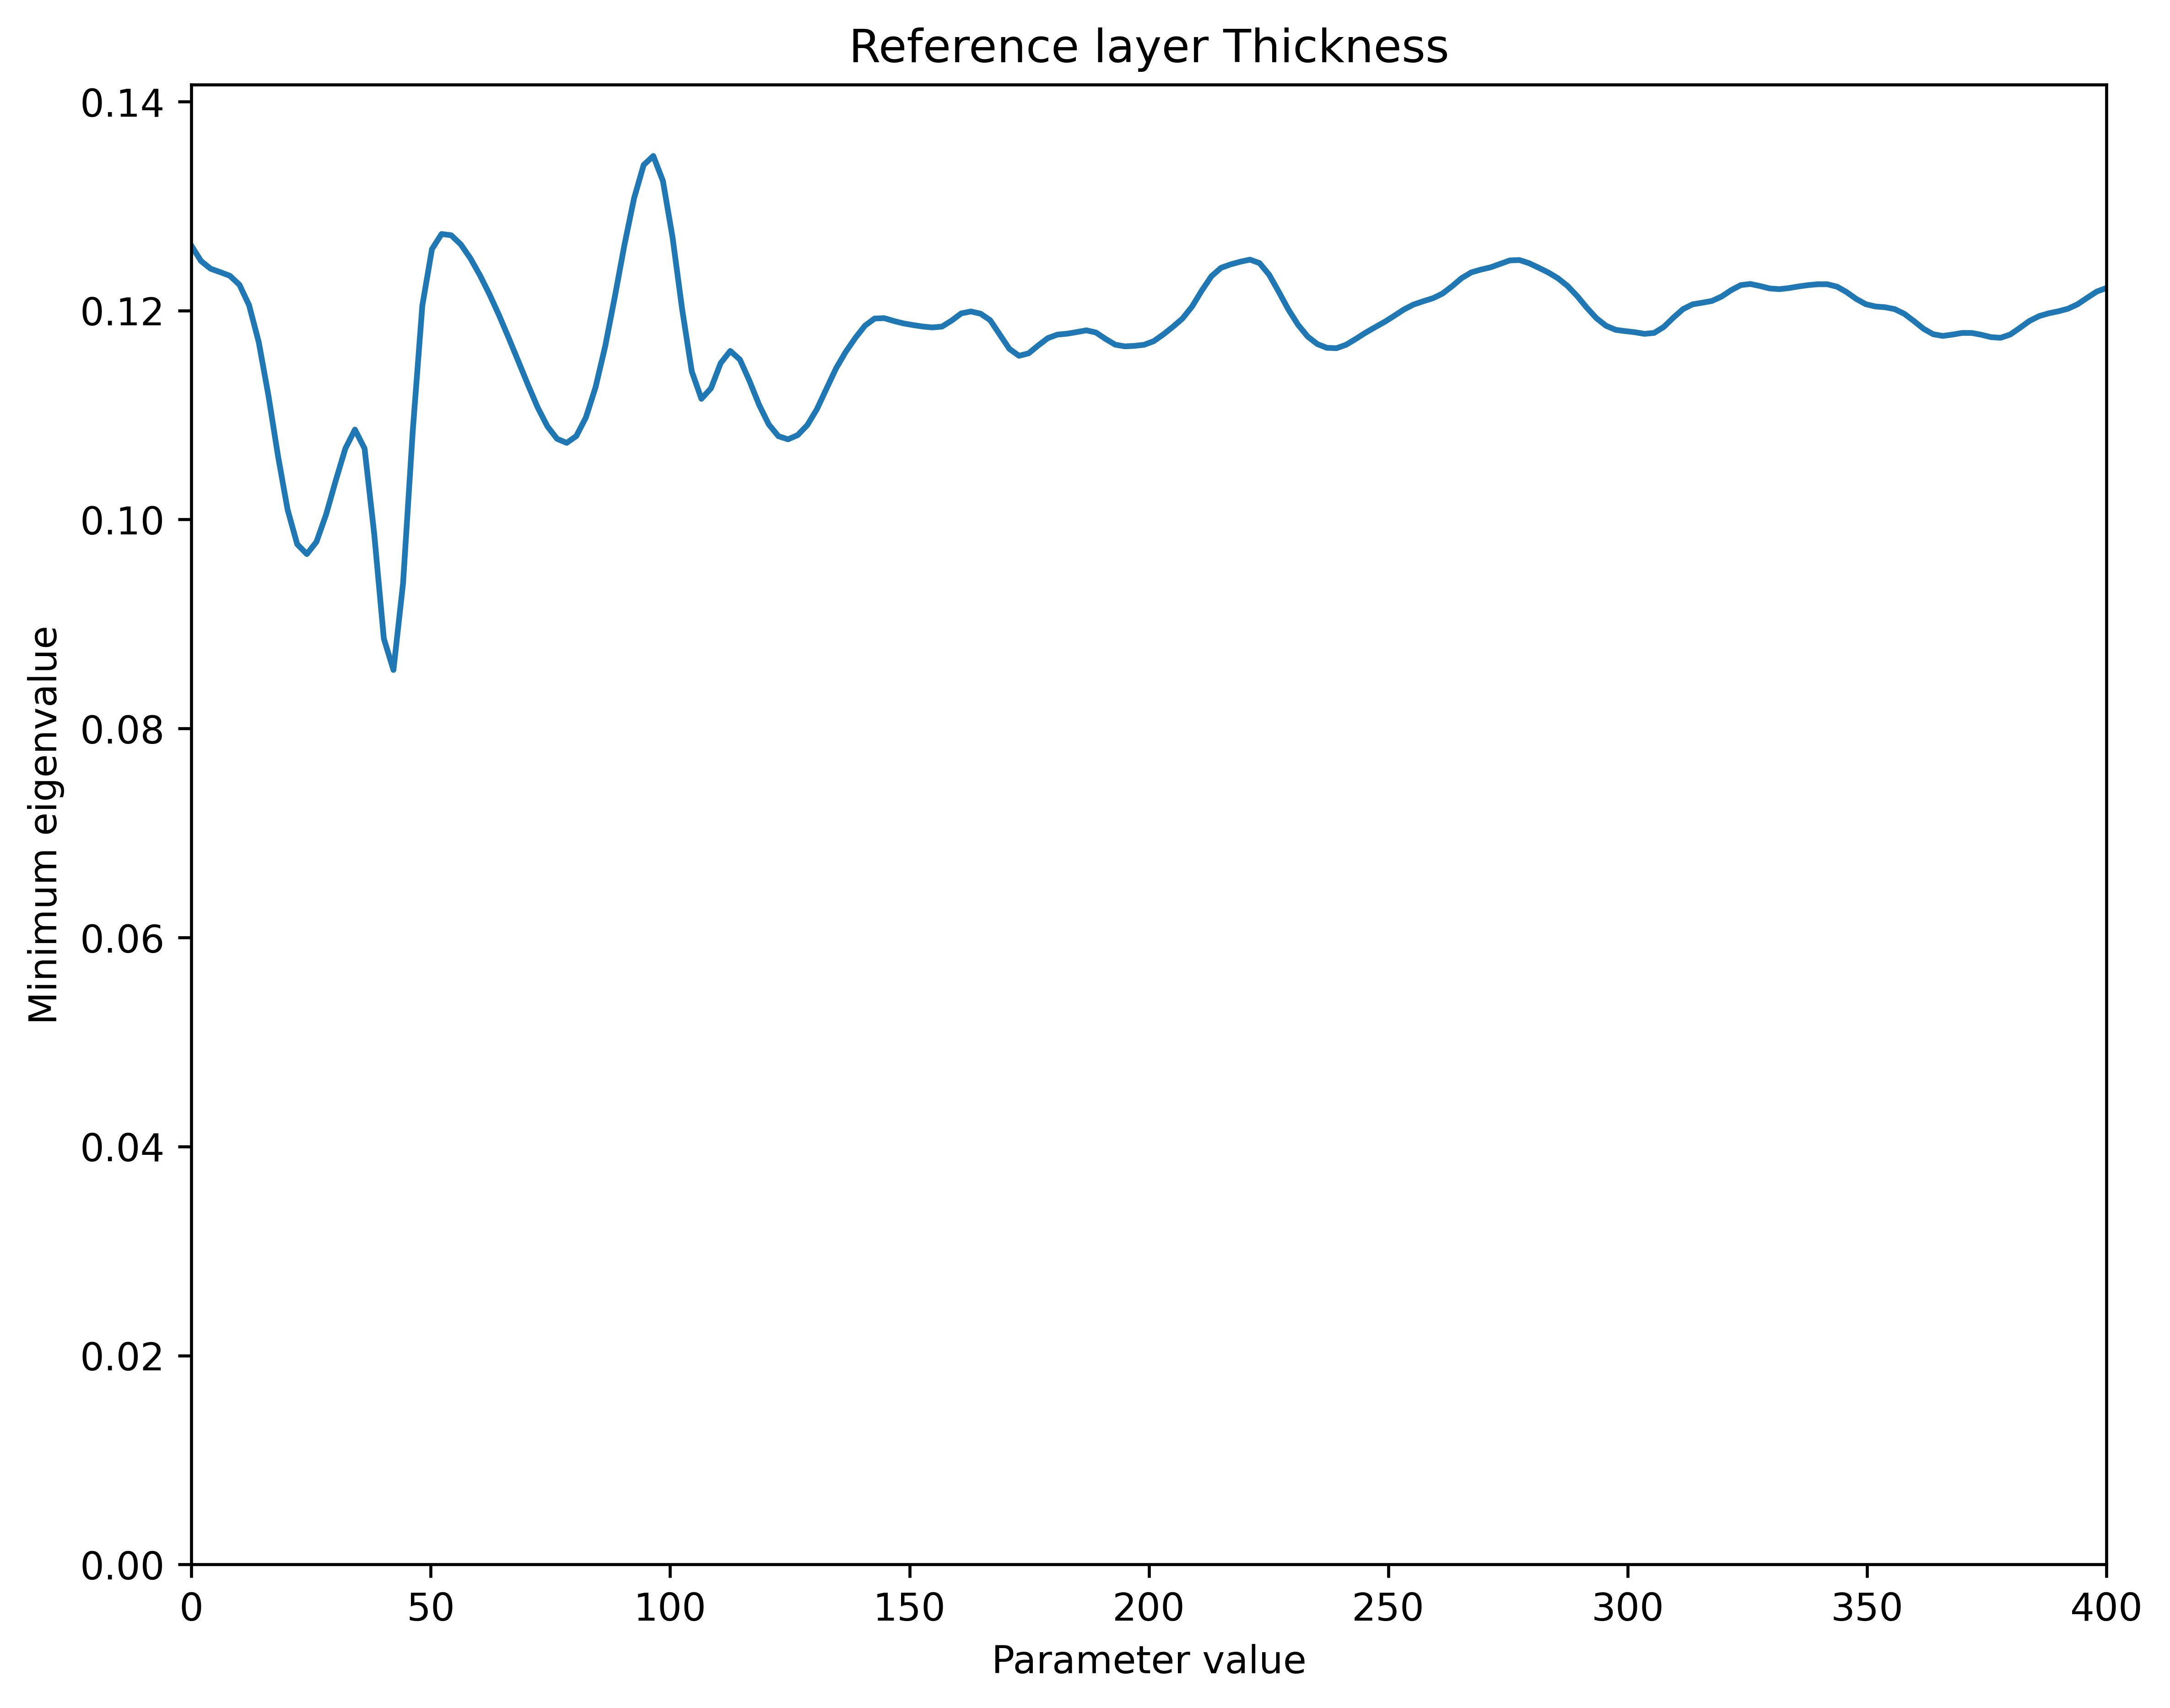

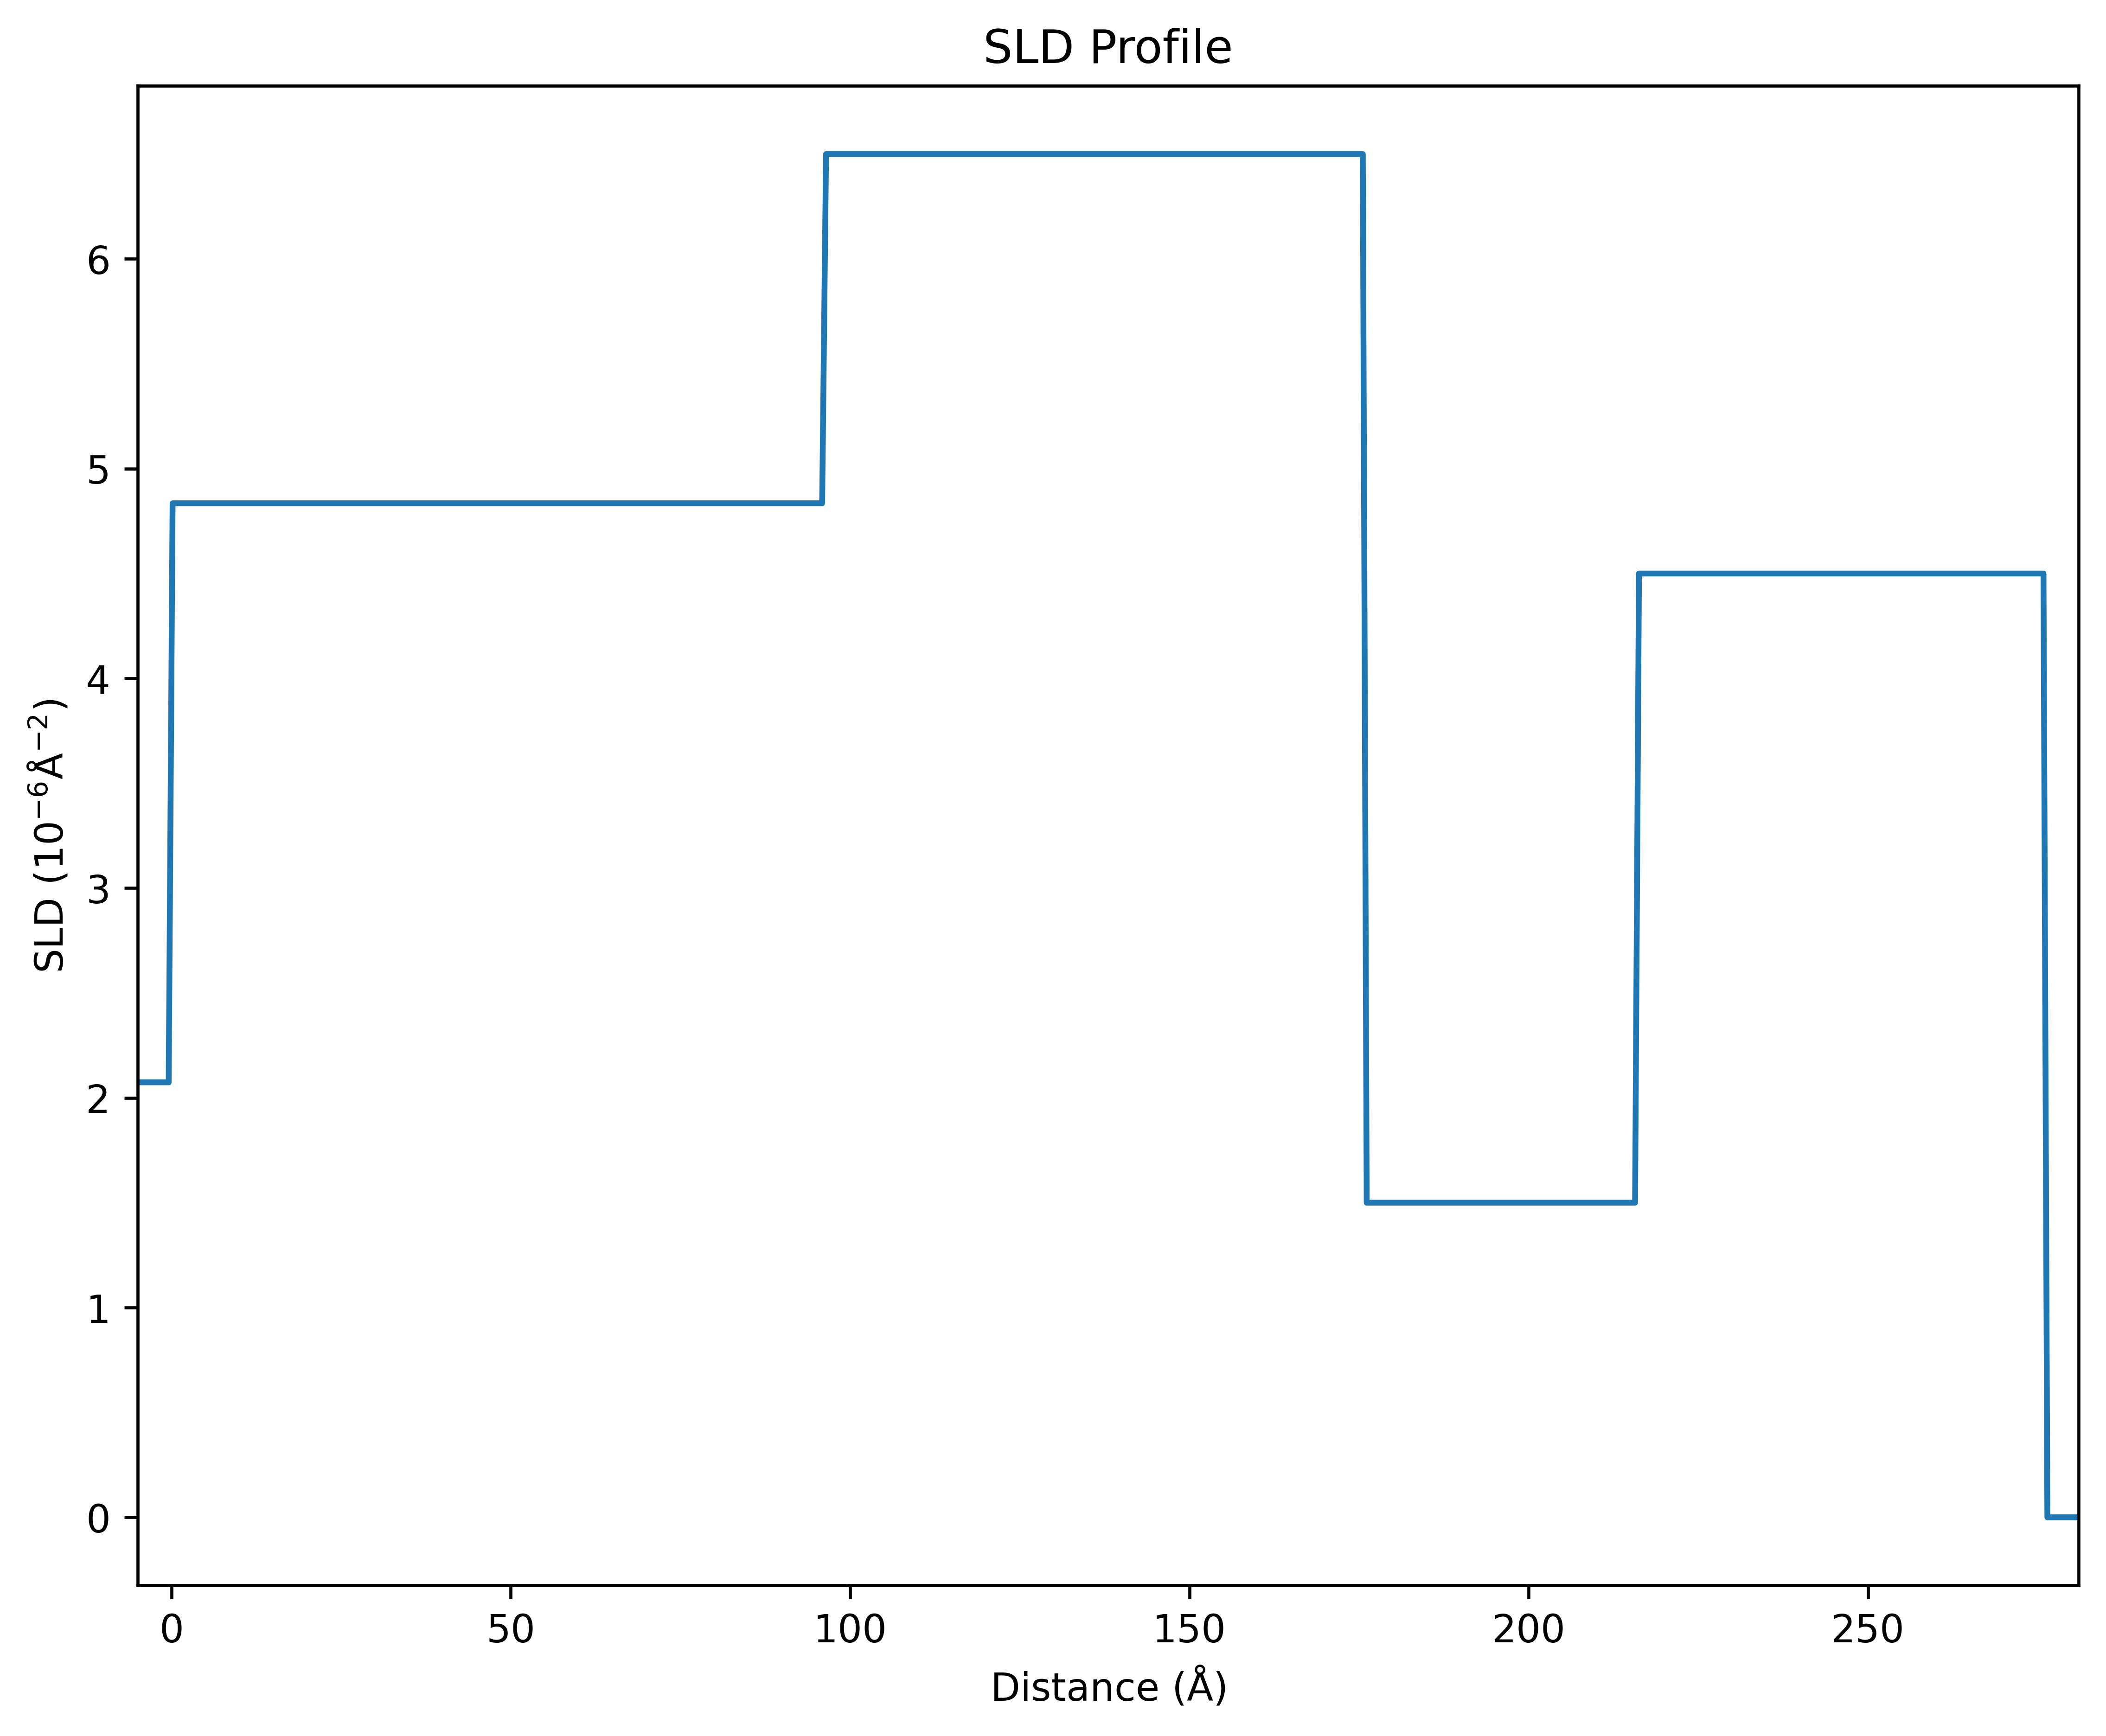

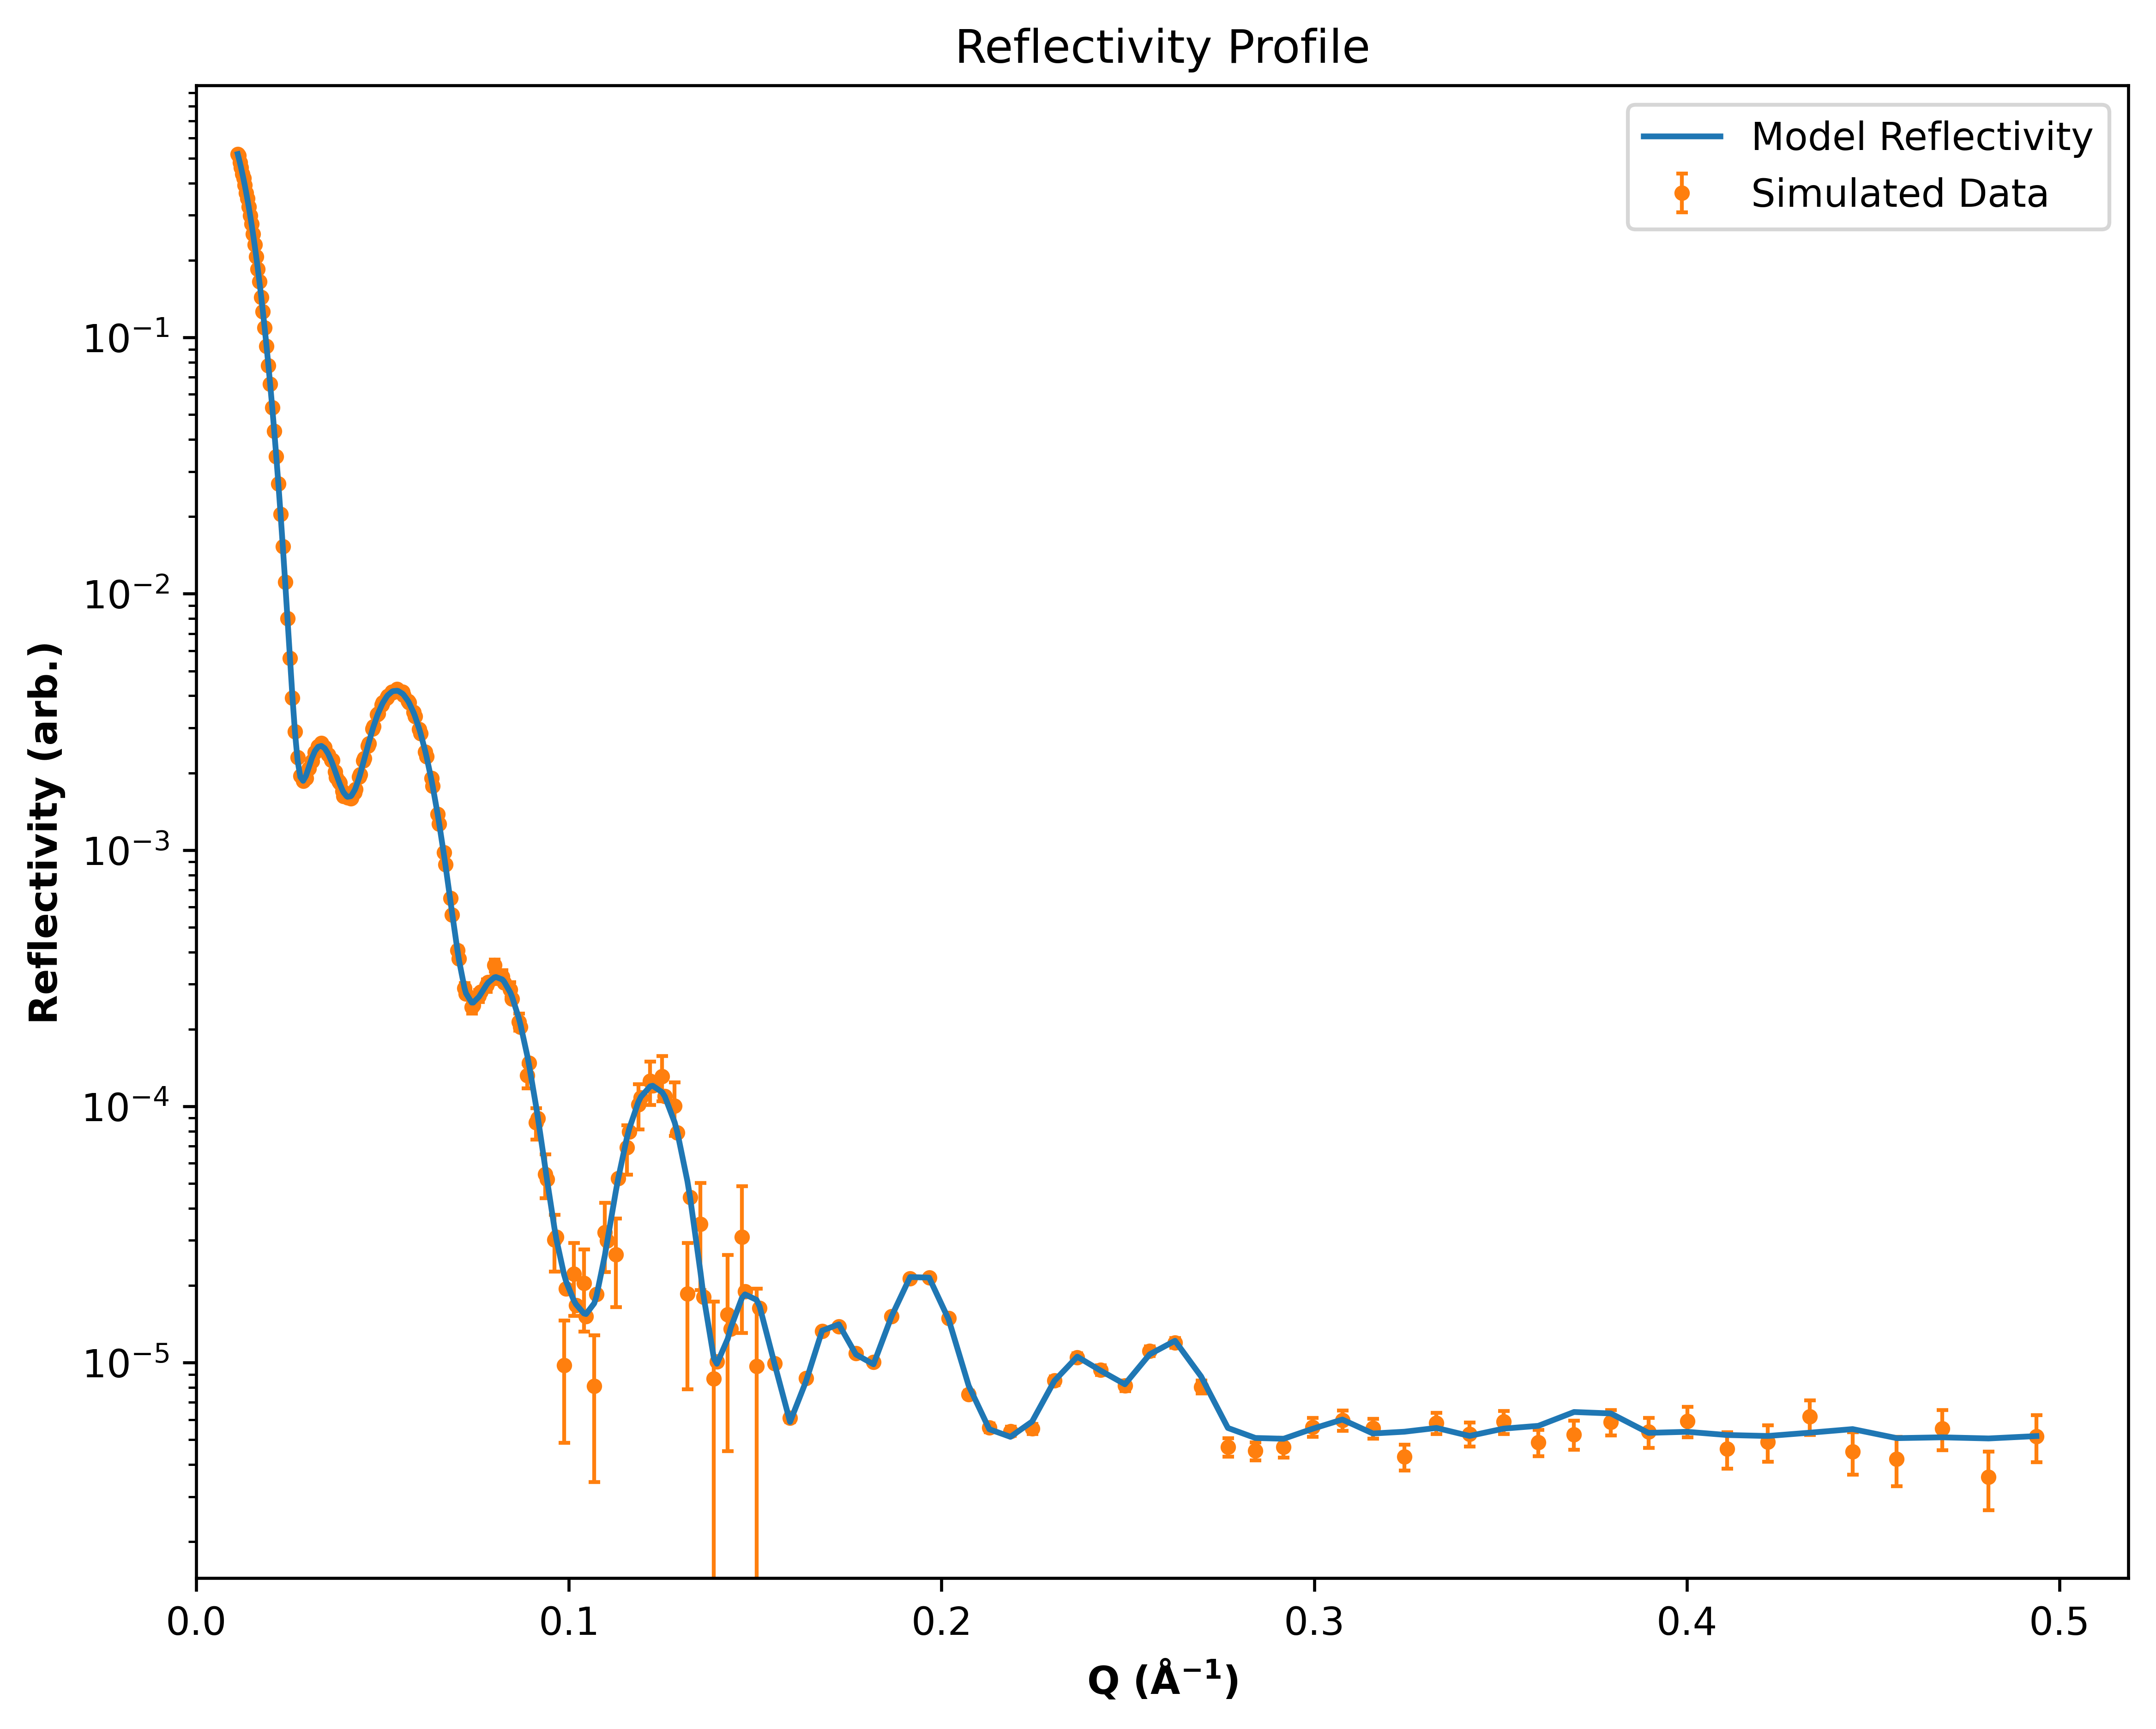

In [7]:
sample_structure = simple_sample_MRL()
magnetic_sample = Sample(sample_structure, polarised=False)
angle_times = [(0.7, 100, 100),
               (2.3, 100, 400),
               ]
optimise_parameters(magnetic_sample, angle_times)